In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
import re
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Adjust display options to show full content
pd.set_option('display.max_colwidth', None)  # No truncation for column content
pd.set_option('display.max_rows', None)      # Display all rows (set a limit if data is large)
pd.set_option('display.max_columns', None)   # Display all columns

In [4]:
df_CombinedData = pd.read_csv(r'DataSets\New_Structured_Data\Combined_Cars_Data.csv',low_memory=False)   
df_CombinedData.head(10)

,city,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen
0,Bangalore,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,...,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,235-litres,NaN,NaN,NaN
1,Bangalore,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,...,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",4.0,352-litres,16,16,NaN
2,Bangalore,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,...,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,5.0,242-litres,14,14,NaN
3,Bangalore,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,...,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4.0,407-litres,14,14,NaN
4,Bangalore,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,...,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5.0,353-litres,16,16,NaN
5,Bangalore,0,Diesel,SUV,"20,000",Manual,1,1st Owner,Jeep,Jeep Compass,...,Disc,Discs,NaN,NaN,"Radial, Tubless",5.0,408-litres,17,17,NaN
6,Bangalore,0,Petrol,Hatchback,"37,772",Manual,1,1st Owner,Datsun,Datsun GO,...,Disc,Drum,150 Kmph,13.3 Seconds,Tubeless,5.0,265-litres,NaN,NaN,NaN
7,Bangalore,0,Petrol,SUV,"30,000",Automatic,1,1st Owner,Hyundai,Hyundai Venue,...,Disc,Drum,NaN,NaN,Radial,5.0,350,16,16,190mm
8,Bangalore,0,Petrol,Sedan,"37,000",Automatic,1,1st Owner,Maruti,Maruti Ciaz,...,Ventilated Disc,Drum,NaN,NaN,"Tubeless, Radial",4.0,510-litres,16,16,NaN
9,Bangalore,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,...,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,5.0,242-litres,NaN,NaN,NaN


In [5]:
df_CombinedData.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   city                           8369 non-null   object 
 1   it                             8369 non-null   int64  
 2   ft                             8369 non-null   object 
 3   bt                             8365 non-null   object 
 4   km                             8369 non-null   object 
 5   transmission                   8369 non-null   object 
 6   ownerNo                        8369 non-null   int64  
 7   owner                          8369 non-null   object 
 8   oem                            8369 non-null   object 
 9   model                          8369 non-null   object 
 10  modelYear                      8369 non-null   int64  
 11  centralVariantId               8369 non-null   int64  
 12  variantName                    8369 non-null   o

In [6]:
df_CombinedData.columns

Index(['city', 'it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner',
       'oem', 'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'imgUrl', 'heading',
       'desc', 'Registration Year', 'Insurance Validity', 'Fuel Type', 'Seats',
       'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'Features', 'Comfort & Convenience', 'Interior',
       'Exterior', 'Safety', 'Entertainment & Communication', 'Mileage',
       'Engine', 'Max Power', 'Torque', 'Seats.1', 'Color', 'Engine Type',
       'Displacement', 'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke',
       'Compression Ratio', 'Turbo Charger', 'Super Charger', 'Length',
       'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread',
       'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type',
       'Seating Capacity', 'Stee

In [6]:
# Dropping Columns based on the Nullvalues,uniquesvalues, unwanted data,repeated column .

In [7]:
df_CombinedData.drop(columns=['it','priceActual','priceSaving','priceFixedText','imgUrl','heading','desc','Max Torque'],inplace=True,axis = 1)

In [8]:
df_CombinedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 68 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   city                           8369 non-null   object 
 1   ft                             8369 non-null   object 
 2   bt                             8365 non-null   object 
 3   km                             8369 non-null   object 
 4   transmission                   8369 non-null   object 
 5   ownerNo                        8369 non-null   int64  
 6   owner                          8369 non-null   object 
 7   oem                            8369 non-null   object 
 8   model                          8369 non-null   object 
 9   modelYear                      8369 non-null   int64  
 10  centralVariantId               8369 non-null   int64  
 11  variantName                    8369 non-null   object 
 12  price                          8369 non-null   o

In [9]:
#Checking the Datas of the column1 and column2 are same or Not, for Deleting the column .
# If both are same ,you can choose either one column. 

In [9]:
def RowData_Checking(column1, column2):
    if df_CombinedData[column1].all() == df_CombinedData[column2].all():
        return f'All the datas are same in {column1} and {column2}'
    else:
        return f'Datas are different in {column1} and {column2}'

In [10]:
val1 = RowData_Checking('transmission', 'Transmission')
print(val1)
print('-----------------------------')

val2 = RowData_Checking('ft', 'Fuel Type')
print(val2)
print('-----------------------------')

val3 = RowData_Checking('Wheel Size','Alloy Wheel Size')
print(val3)
print('-----------------------------')

All the datas are same in transmission and Transmission
-----------------------------
All the datas are same in ft and Fuel Type
-----------------------------
All the datas are same in Wheel Size and Alloy Wheel Size
-----------------------------


In [12]:
# Checking the Percentage of the non null values in each columns

In [11]:
def PercentageOf_Data(Column):
    PercentOf_NonNull = ((df_CombinedData[Column].shape[0] - df_CombinedData[Column].isna().sum()) / df_CombinedData[Column].shape[0]) * 100
    if PercentOf_NonNull > 50 :
        return f'Percentage of non null values of {Column} is above 50% , which is \033[92m{PercentOf_NonNull:.2f}%\033[0m.'
    else :
        return f'Percentage of non null values of {Column} is below or equal to 50% , which is \033[91m{PercentOf_NonNull:.2f}%\033[0m.'

In [12]:
for col in df_CombinedData.columns:
    col1 = PercentageOf_Data(col)
    print(col1)
    print("------------------------")

Percentage of non null values of city is above 50% , which is 100.00%.
------------------------
Percentage of non null values of ft is above 50% , which is 100.00%.
------------------------
Percentage of non null values of bt is above 50% , which is 99.95%.
------------------------
Percentage of non null values of km is above 50% , which is 100.00%.
------------------------
Percentage of non null values of transmission is above 50% , which is 100.00%.
------------------------
Percentage of non null values of ownerNo is above 50% , which is 100.00%.
------------------------
Percentage of non null values of owner is above 50% , which is 100.00%.
------------------------
Percentage of non null values of oem is above 50% , which is 100.00%.
------------------------
Percentage of non null values of model is above 50% , which is 100.00%.
------------------------
Percentage of non null values of modelYear is above 50% , which is 100.00%.
------------------------
Percentage of non null values 

In [13]:
# Based on the analysis conducted on each column, a decision was made to delete the selected columns.

In [14]:
df_CombinedData.drop(columns=['Kms Driven','Ownership','owner','Year of Manufacture','Engine Displacement',
                              'Engine','Seats.1','Seats','ft','Alloy Wheel Size','transmission','BoreX Stroke',
                              'Compression Ratio','Gross Weight','No Door Numbers','Ground Clearance Unladen'],inplace = True, axis = 1)

In [15]:
print(f'Total No. of columns: {df_CombinedData.shape[1]}' )

Total No. of columns: 52


In [16]:
df_CombinedData.head(5)

,city,bt,km,ownerNo,oem,model,modelYear,centralVariantId,variantName,price,...,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Cargo Volumn,Wheel Size
0,Bangalore,Hatchback,"1,20,000",3,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,...,5.0,Power,4.7 metres,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",235-litres,NaN
1,Bangalore,SUV,"32,706",2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,...,5.0,Power,5.3 metres,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",352-litres,16
2,Bangalore,Hatchback,"11,949",1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,...,5.0,Power,4.9 meters,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,242-litres,14
3,Bangalore,Sedan,"17,794",1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,...,5.0,Power,4.7 metres,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",407-litres,14
4,Bangalore,SUV,"60,000",1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,...,5.0,Power,5.2 meters,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",353-litres,16


In [17]:
df_CombinedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   city                           8369 non-null   object 
 1   bt                             8365 non-null   object 
 2   km                             8369 non-null   object 
 3   ownerNo                        8369 non-null   int64  
 4   oem                            8369 non-null   object 
 5   model                          8369 non-null   object 
 6   modelYear                      8369 non-null   int64  
 7   centralVariantId               8369 non-null   int64  
 8   variantName                    8369 non-null   object 
 9   price                          8369 non-null   object 
 10  Registration Year              8317 non-null   object 
 11  Insurance Validity             8365 non-null   object 
 12  Fuel Type                      8369 non-null   o

# Formatting And Converting the Columns

In [18]:
def convert_to_numeric(column):
    
    def extract_number(value):
        if pd.isna(value):
            return value  # Keep NaN as is
        try:
            # Handle 'Lakh' and remove monetary symbols
            value = str(value).replace('₹', '').replace('Lakh', '00000').strip()
            # Extract numeric part using regex
            match = re.search(r'-?\d+(\.\d+)?', value.replace(',', ''))
            if match:
                return float(match.group())
            else:
                return np.nan
        except ValueError:
            return value  # Return NaN if conversion fails

    return column.apply(extract_number)

In [19]:
#Formatting and Converting the km Column
df_CombinedData['km'] = convert_to_numeric(df_CombinedData['km'])
df_CombinedData['km'].astype(int)

0       120000
1        32706
2        11949
3        17794
4        60000
         ...  
8364     10000
8365    120000
8366     50000
8367     40000
8368    120000
Name: km, Length: 8369, dtype: int64

In [20]:
#Formatting and Converting the Price Column 
df_CombinedData['price'] = convert_to_numeric(df_CombinedData['price']) * 100000
df_CombinedData['price'].astype(int)

0       400000
1       811000
2       585000
3       462000
4       790000
         ...  
8364    509999
8365    180000
8366    550000
8367    140000
8368    500000
Name: price, Length: 8369, dtype: int64

In [22]:
#Formatting and Converting the Mileage Column 
df_CombinedData['Mileage'] = convert_to_numeric(df_CombinedData['Mileage'])
df_CombinedData['Mileage']

0       23.10
1       17.00
2       23.84
3       19.10
4       23.65
        ...  
8364    25.24
8365    22.74
8366    11.74
8367    18.50
8368    19.72
Name: Mileage, Length: 8369, dtype: float64

In [21]:
#Formatting and Converting the Max Power Column
df_CombinedData['Max Power'] = convert_to_numeric( df_CombinedData['Max Power'] )
df_CombinedData['Max Power']

0        67.04
1       121.31
2        84.00
3        81.86
4        88.50
         ...  
8364     65.71
8365     47.30
8366    186.00
8367     85.80
8368    108.45
Name: Max Power, Length: 8369, dtype: float64

In [23]:
#Formatting and Converting the Torque Column
df_CombinedData['Torque'] = convert_to_numeric( df_CombinedData['Torque'] )
df_CombinedData['Torque']

0        90.00
1       150.00
2       114.00
3       113.75
4       200.00
         ...  
8364     89.00
8365     69.00
8366    285.00
8367    114.00
8368    245.00
Name: Torque, Length: 8369, dtype: float64

In [24]:
Column_mm = ['Length','Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread']

for i in Column_mm:
    try:
        # Attempt to process the column with the convert_to_numeric function
        df_CombinedData[i] = convert_to_numeric(df_CombinedData[i])
        print(f"Processed column: {i}")
        print(df_CombinedData[i].head())  # Display the first few rows for verification
        print('Total Null values:', df_CombinedData[i].isna().sum())
        print('---------------------------------------------------')
    except Exception as e:
        # Catch and display any errors that occur during processing
        print(f"Error processing column {i}: {e}")
        print('---------------------------------------------------')  


Processed column: Length
0    3715.0
1    3998.0
2    3746.0
3    3995.0
4    4300.0
Name: Length, dtype: float64
Total Null values: 79
---------------------------------------------------
Processed column: Width
0    1635.0
1    1765.0
2    1647.0
3    1660.0
4    1785.0
Name: Width, dtype: float64
Total Null values: 83
---------------------------------------------------
Processed column: Height
0    1565.0
1    1647.0
2    1535.0
3    1520.0
4    1595.0
Name: Height, dtype: float64
Total Null values: 79
---------------------------------------------------
Processed column: Wheel Base
0    2425.0
1    2519.0
2    2400.0
3    2425.0
4    2600.0
Name: Wheel Base, dtype: float64
Total Null values: 163
---------------------------------------------------
Processed column: Front Tread
0    1420.0
1       NaN
2    1400.0
3    1479.0
4       NaN
Name: Front Tread, dtype: float64
Total Null values: 3558
---------------------------------------------------
Processed column: Rear Tread
0    1410.0


In [25]:
Column_mm1 = ['Kerb Weight','Gear Box', 'Turning Radius', 'Top Speed', 'Acceleration', 'Cargo Volumn']

for i in Column_mm1:
    try:
        # Attempt to process the column with the convert_to_numeric function
        df_CombinedData[i] = convert_to_numeric(df_CombinedData[i])
        print(f"Processed column: {i}")
        print(df_CombinedData[i].head())  # Display the first few rows for verification
        print('Total Null values:', df_CombinedData[i].isna().sum())
        print('---------------------------------------------------')
    except Exception as e:
        # Catch and display any errors that occur during processing
        print(f"Error processing column {i}: {e}")
        print('---------------------------------------------------') 

Processed column: Kerb Weight
0     835.0
1    1242.0
2    1012.0
3    1180.0
4    1230.0
Name: Kerb Weight, dtype: float64
Total Null values: 60
---------------------------------------------------
Processed column: Gear Box
0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
Name: Gear Box, dtype: float64
Total Null values: 326
---------------------------------------------------
Processed column: Turning Radius
0    4.7
1    5.3
2    4.9
3    4.7
4    5.2
Name: Turning Radius, dtype: float64
Total Null values: 1600
---------------------------------------------------
Processed column: Top Speed
0    150.0
1      NaN
2    150.0
3    172.0
4    190.0
Name: Top Speed, dtype: float64
Total Null values: 3787
---------------------------------------------------
Processed column: Acceleration
0    15.05
1      NaN
2    14.30
3    14.20
4    12.00
Name: Acceleration, dtype: float64
Total Null values: 3512
---------------------------------------------------
Processed column: Cargo Volumn
0    235.0
1  

In [26]:
#Formatting and Converting the Torque Column
df_CombinedData['Wheel Size'] = convert_to_numeric( df_CombinedData['Wheel Size'] )
df_CombinedData['Wheel Size']

0        NaN
1       16.0
2       14.0
3       14.0
4       16.0
        ... 
8364     NaN
8365     NaN
8366    17.0
8367    14.0
8368    16.0
Name: Wheel Size, Length: 8369, dtype: float64

In [29]:
#Formatting and Converting the Registration Year Column to int data type

In [27]:
def extract_years(column):

    def extract_year(value):
        if pd.isna(value):
            return np.nan  # Keep NaN as is
        try:
            # Extract years (two or four digits) using regex
            match = re.search(r'(\d{4}|\d{2})', str(value))
            if match:
                year = match.group()
                # Convert two-digit years to four-digit (assuming 2000s)
                return int(year) if len(year) == 4 else int('20' + year)
            else:
                return value
        except ValueError:
            return value  # Return existing value if conversion fails

    return column.apply(extract_year)

In [28]:
# Apply the function

df_CombinedData['Registration Year'] = extract_years(df_CombinedData['Registration Year'])
df_CombinedData['Registration Year']

0       2015.0
1       2018.0
2       2018.0
3       2014.0
4       2015.0
         ...  
8364    2022.0
8365    2014.0
8366    2011.0
8367    2012.0
8368    2017.0
Name: Registration Year, Length: 8369, dtype: float64

In [29]:
df_CombinedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   city                           8369 non-null   object 
 1   bt                             8365 non-null   object 
 2   km                             8369 non-null   float64
 3   ownerNo                        8369 non-null   int64  
 4   oem                            8369 non-null   object 
 5   model                          8369 non-null   object 
 6   modelYear                      8369 non-null   int64  
 7   centralVariantId               8369 non-null   int64  
 8   variantName                    8369 non-null   object 
 9   price                          8369 non-null   float64
 10  Registration Year              8317 non-null   float64
 11  Insurance Validity             8365 non-null   object 
 12  Fuel Type                      8369 non-null   o

# Handling Null Values in the Columns

1, column : 'bt'

In [30]:
# Define a mapping for standardization
body_type_mapping = {
    'hatchback': 'Hatchback',
    'suv': 'SUV',
    'sedan': 'Sedan',
    'muv': 'MUV',
    'muv': 'MUV',
    'coupe': 'Coupe',
    'minivans': 'Minivan',
    'pickup trucks': 'Pickup Truck',
    'convertibles': 'Convertible',
    'hybrids': 'Hybrid',
    'wagon': 'Wagon'
}

# Standardize the values in the column
df_CombinedData['bt'] = (
    df_CombinedData['bt']
    .str.strip()  # Remove leading/trailing spaces
    .str.lower()  # Convert to lowercase
    .replace(body_type_mapping)  # Map to standardized values
    .str.capitalize()  # Capitalize for consistency
)

In [31]:
df_CombinedData['bt'].unique()

array(['Hatchback', 'Suv', 'Sedan', 'Muv', 'Coupe', 'Minivan',
       'Pickup truck', 'Convertible', 'Hybrid', nan, 'Wagon'],
      dtype=object)

In [32]:
# Fill NaN values in 'bt' based on the mode of each 'Model'
for model in df_CombinedData['model'].unique():
    mode_value = df_CombinedData.loc[df_CombinedData['model'] == model, 'bt'].mode()
    if not mode_value.empty:
        df_CombinedData.loc[(df_CombinedData['model'] == model) & (df_CombinedData['bt'].isna()), 'bt'] = mode_value[0]

df_CombinedData['bt'].isna().sum()

np.int64(1)

In [33]:
#Externally handling the null values for the Toyoto Vellfire
df_CombinedData['bt'] = df_CombinedData['bt'].fillna('Muv')

In [34]:
df_CombinedData['bt'].isna().sum()

np.int64(0)

2, column: 'Registration Year'

In [35]:
df_CombinedData['Registration Year'].unique()

array([2015., 2018., 2014., 2020., 2017., 2021., 2019., 2022., 2016.,
       2011., 2009., 2013., 2010., 2008., 2006., 2012., 2005., 2007.,
       2023.,   nan, 2004., 2003., 2002.])

In [36]:
#Filling Null values of Registration Year by corresponding values of modelYear
df_CombinedData['Registration Year'] = df_CombinedData['Registration Year'].fillna(df_CombinedData['modelYear'])

In [37]:
df_CombinedData['Registration Year'].isna().sum()

np.int64(0)

3, column: 'Insurance Validity'

In [38]:
#Checking the Unique Values of the Insurance Validity column
df_CombinedData['Insurance Validity'].unique()

array(['Third Party insurance', 'Comprehensive', 'Third Party',
       'Zero Dep', nan, '2', '1', 'Not Available'], dtype=object)

In [39]:
# Step 1: Replace 'Third Party insurance' with 'Third Party'
df_CombinedData['Insurance Validity'] = df_CombinedData['Insurance Validity'].replace(
    'Third Party insurance', 'Third Party'
)

# Step 2: Replace '1' with 'Comprehensive' and '2' with 'Third Party'
df_CombinedData['Insurance Validity'] = df_CombinedData['Insurance Validity'].replace({
    '2': 'Third Party',
    '1': 'Comprehensive'
})

# Step 3: Handle NaN values by replacing with 'Not Available'
df_CombinedData['Insurance Validity'] = df_CombinedData['Insurance Validity'].fillna('Not Available')

In [40]:
df_CombinedData['Insurance Validity'].isna().sum()

np.int64(0)

4, column: 'RTO'

In [41]:
# Define a function to fill NaN values with the mode of the group
def fill_with_mode(group):
    return group.fillna(group.mode().iloc[0]) if not group.mode().empty else group

In [42]:
# Group by 'City' and apply the function to the 'RTO' column
df_CombinedData['RTO'] = df_CombinedData.groupby('city')['RTO'].transform(fill_with_mode)

In [43]:
df_CombinedData['RTO'].isna().sum()

np.int64(0)

5, column: 'Comfort & Convenience'

In [44]:
df_CombinedData['Comfort & Convenience'].unique()

array([10., 17., 14., 16., 21., 13., 11., 20., 22., 15., 26., 19., 25.,
        8., 31., 32., 30., 18.,  6., 23., 24.,  5.,  9., 12., 28., 27.,
        7., 29., nan,  2.,  4.,  3.,  1., 35., 33., 34., 37.])

In [48]:
# Group by 'Model' and apply the function to the 'Comfort & Convenience' column
df_CombinedData['Comfort & Convenience'] = df_CombinedData.groupby('model')['Comfort & Convenience'].transform(fill_with_mode)

In [45]:
#checking for nan values
df_CombinedData['Comfort & Convenience'].isna().sum()

np.int64(68)

In [46]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Comfort & Convenience'] = df_CombinedData['Comfort & Convenience'].fillna(df_CombinedData['Comfort & Convenience'].mode()[0])

In [47]:
#checking for nan values after handling nan
df_CombinedData['Comfort & Convenience'].isna().sum()

np.int64(0)

6, column: 'Interior'

In [48]:
df_CombinedData['Interior'].unique()

array([ 7., 12., 10., 11.,  8.,  9., 13., 15.,  6., 16., 14.,  4.,  3.,
        5., nan,  2.,  1., 17., 18.])

In [49]:
# Group by 'Model' and apply the function to the 'Comfort & Convenience' column
df_CombinedData['Interior'] = df_CombinedData.groupby('model')['Interior'].transform(fill_with_mode)

In [50]:
#checking for nan values
df_CombinedData['Interior'].isna().sum()

np.int64(10)

In [51]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Interior'] = df_CombinedData['Interior'].fillna(df_CombinedData['Interior'].mode()[0])

In [52]:
#checking for nan values
df_CombinedData['Interior'].isna().sum()

np.int64(0)

7, column: 'Exterior'

In [53]:
df_CombinedData['Exterior'].unique()

array([ 5., 12., 13., 10., 15., 11., 16., 23.,  7., 14.,  8.,  9.,  6.,
       20., 18.,  2., 19., 17.,  4.,  3., 22., 27., 26., 21., nan, 24.,
        1., 25.])

In [54]:
# Group by 'Model' and apply the function to the 'Comfort & Convenience' column
df_CombinedData['Exterior'] = df_CombinedData.groupby('model')['Exterior'].transform(fill_with_mode)

In [55]:
#checking for nan values
df_CombinedData['Exterior'].isna().sum()

np.int64(24)

In [56]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Exterior'] = df_CombinedData['Exterior'].fillna(df_CombinedData['Exterior'].mode()[0])

In [57]:
#checking for nan values
df_CombinedData['Exterior'].isna().sum()

np.int64(0)

8, column: 'Safety'

In [58]:
df_CombinedData['Safety'].unique()

array([13., 27., 24., 18., 22., 17., 31., 29., 25., 20., 23., 33., 26.,
       16., 37., 30., 38., 34., 36., 21., 45.,  6., 35., 19., 40., 14.,
        7., 15., 28., 32., 10., 11., 12., 39., nan, 41., 42.,  8.,  9.,
        1.,  5., 44., 48.])

In [59]:
# Group by 'Model' and apply the function to the 'Comfort & Convenience' column
df_CombinedData['Safety'] = df_CombinedData.groupby('model')['Safety'].transform(fill_with_mode)

In [60]:
#checking for nan values
df_CombinedData['Safety'].isna().sum()

np.int64(20)

In [61]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Safety'] = df_CombinedData['Safety'].fillna(df_CombinedData['Safety'].mode()[0])

In [62]:
#checking for nan values
df_CombinedData['Exterior'].isna().sum()

np.int64(0)

9, column: 'Entertainment & Communication'

In [63]:
df_CombinedData['Entertainment & Communication'].unique()

array([nan,  9.,  8.,  7.,  5.,  6.,  4., 12., 11., 13., 10., 21.,  2.,
        3.,  1., 15., 14., 16., 19., 17.])

In [64]:
# Group by 'Model' and apply the function to the 'Comfort & Convenience' column
df_CombinedData['Entertainment & Communication'] = df_CombinedData.groupby('model')['Entertainment & Communication'].transform(fill_with_mode)

In [65]:
#checking for nan values
df_CombinedData['Entertainment & Communication'].isna().sum()

np.int64(120)

In [66]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Entertainment & Communication'] = df_CombinedData['Entertainment & Communication'].fillna(df_CombinedData['Entertainment & Communication'].mode()[0])

In [67]:
#checking for nan values
df_CombinedData['Entertainment & Communication'].isna().sum()

np.int64(0)

10, column: 'Mileage'

In [68]:
# Fill NA values in Mileage based on Model and Fuel Type
df_CombinedData['Mileage'] = df_CombinedData.groupby(['model', 'Fuel Type'])['Mileage'].transform(
    lambda x: x.fillna(x.median())
)

d:\DataScience\GUVI\DataScience_GUVI_Projects\guviproj_env\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\DataScience\GUVI\DataScience_GUVI_Projects\guviproj_env\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\DataScience\GUVI\DataScience_GUVI_Projects\guviproj_env\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\DataScience\GUVI\DataScience_GUVI_Projects\guviproj_env\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\DataScience\GUVI\DataScience_GUVI_Projects\guviproj_env\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanme

In [69]:
#checking for nan values
df_CombinedData['Mileage'].isna().sum()

np.int64(84)

In [70]:
# If some combinations of Model and Fuel Type have no mileage data, 
# we can Fallback to filling based on Fuel Type only
df_CombinedData['Mileage'] = df_CombinedData.groupby('Fuel Type')['Mileage'].transform(
    lambda x: x.fillna(x.median())
)


In [71]:
#checking for nan values
df_CombinedData['Mileage'].isna().sum()

np.int64(0)

11, column: 'Max Power'

In [72]:
# Compute median for each group
group_median = df_CombinedData.groupby(['modelYear', 'model'])['Max Power'].transform('median')

# Fill NaN values with group median or overall median
df_CombinedData['Max Power'] = df_CombinedData['Max Power'].fillna(group_median).fillna(df_CombinedData['Max Power'].median())


In [73]:
df_CombinedData['Max Power'].isna().sum()

np.int64(0)

12, column: 'Torque'

In [74]:
# Compute median for each group
group_median = df_CombinedData.groupby(['modelYear', 'model'])['Torque'].transform('median')

# Fill NaN values with group median or overall median
df_CombinedData['Torque'] = df_CombinedData['Torque'].fillna(group_median).fillna(df_CombinedData['Torque'].median())

In [75]:
#checking for nan values
df_CombinedData['Torque'].isna().sum()

np.int64(0)

13, column: 'color'

In [76]:
df_CombinedData['Color'].unique()

array(['White', 'Red', 'Others', 'Gray', 'Grey', 'Maroon', 'Orange',
       'Silver', 'Blue', 'Brown', 'Yellow', 'Black', 'Golden', 'Green',
       'O Purple', nan, 'Other', 'Gold', 'TITANIUM GREY', 'Violet',
       'MODERN STEEL METALLIC', 'PLATINUM WHITE', 'Golden Brown',
       'Aurora Black Pearl', 'Beige', 'Star Dust', 'Flash Red', 'Purple',
       'PLATINUM WHITE PEARL', 'Wine Red', 'Taffeta White',
       'Minimal Grey', 'Fiery Red', 'T Wine', 'Prime Star Gaze',
       'TAFETA WHITE', 'P Black', 'Golden brown', 'METALL',
       'MET ECRU BEIGE', 'COPPER', 'TITANIUM', 'CHILL', 'Burgundy',
       'Lunar Silver Metallic', 'SILKY SILVER', 'BERRY RED',
       'PREMIUM AMBER METALLIC', 'R EARTH', 'PLATINUM SILVER',
       'ORCHID WHITE PEARL', 'CARNELIAN RED PEARL', 'POLAR WHITE',
       'BEIGE', 'Medium Blue', 'Alabaster Silver Metallic',
       'Carbon Steel', 'Cavern Grey', 'ESPRESO_BRWN', 'Pearl White',
       'Polar White', 'Magma Grey', 'Dark Red', 'Falsa Colour', 'Cherry',
    

In [77]:
#Checking Number of unique values
df_CombinedData['Color'].nunique()

153

In [78]:
# Define a mapping for color standardization
color_mapping = {
    'white': 'White',
    'red': 'Red',
    'grey': 'Grey',
    'gray': 'Grey',
    'maroon': 'Maroon',
    'orange': 'Orange',
    'silver': 'Silver',
    'blue': 'Blue',
    'brown': 'Brown',
    'yellow': 'Yellow',
    'black': 'Black',
    'gold': 'Gold',
    'golden': 'Gold',
    'green': 'Green',
    'violet': 'Purple',
    'purple': 'Purple',
    'beige': 'Beige',
    'bronze': 'Bronze',
    'burgundy': 'Burgundy',
    'copper': 'Copper',
    'chill': 'Silver',
    'medium blue': 'Blue',
    'pearl white': 'White',
    'polar white': 'White',
    'magma grey': 'Grey',
    'urban titanium': 'Grey',
    'superior white': 'White',
    'diamond white': 'White',
    'caviar black': 'Black',
    'deep black pearl': 'Black',
    'twilight blue': 'Blue',
    'mist silver': 'Silver',
    'candy white': 'White',
    'glistening grey': 'Grey',
    'gravity gray': 'Grey',
    'solid fire red': 'Red',
    'daytona grey': 'Grey',
    'dark blue': 'Blue',
    'sunset red': 'Red',
    'sky blue': 'Blue',
    'light silver': 'Silver',
    'off white': 'White',
    'dark red': 'Red',
    'star dust': 'Grey',
    'fiery red': 'Red',
    'arizona blue': 'Blue',
    'galaxy blue': 'Blue',
    'ruby red': 'Red',
    # Add more mappings as needed
}

# Function to standardize color values
def standardize_color(value):
    if pd.isna(value):
        return value  # Return NaN as is
    value = value.strip().lower()  # Remove extra spaces and convert to lowercase
    for key, standard in color_mapping.items():
        if key in value:
            return standard
    return value.capitalize()  # Default to capitalized version if not mapped

# Apply the function to the 'Color' column
df_CombinedData['Color'] = df_CombinedData['Color'].apply(standardize_color)

In [79]:
#Checking Number of unique values after handling the duplicate values
df_CombinedData['Color'].nunique()

39

In [80]:
# Group by 'Model' and apply the function to the 'Comfort & Convenience' column
df_CombinedData['Color'] = df_CombinedData.groupby('model')['Color'].transform(fill_with_mode)

In [81]:
#checking for nan values
df_CombinedData['Color'].isna().sum()

np.int64(0)

14, column:'Engine Type'

In [82]:
df_CombinedData['Engine Type'].unique()

array(['K10B Engine', 'Ti-VCT Petrol Engine', 'Revotron Engine',
       'Kappa VTVT Petrol Engine', 'DDiS 200 Diesel Engine',
       '2.0-Litre 4-Cyl Multijet II Engine', 'Petrol Engine', nan,
       'k15B VVT Engine', 'VVT Petrol Engine', 'i-VTEC Petrol Engine',
       'mHawk Diesel Engine', 'U2 CRDI Diesel Engine',
       '1.2l Turbocharged Revotron Engine', 'i VTEC Engine',
       'In-Line Engine', 'K Series Dual jet', '1.5L Petrol',
       'V-Type Petrol Engine', '1.1 litre Petrol Engine', 'Bifuel Engine',
       'In-Line Petrol Engine', 'TDI Diesel Engine',
       '2.0L Multijet Diesel', '1.2L Kappa Dual VTVT Petrol',
       'K10B Petrol Engine', 'K15 Smart Hybrid',
       'TwinPower Turbo Inline 4 Cylinder Engine', '4 Cylinders In-line',
       'Dual VTVT Petrol Engine', 'In Line Diesel Engine',
       'F8D Petrol Engine', 'mHawk CRDe Engine', 'Smartstream G1.4',
       '3.0 L in-line 6 cylinder engine', 'V-Type Diesel Engine',
       'Kryotec 2.0 L Turbocharged Engine',
       '

In [83]:
#Checking Number of unique values
df_CombinedData['Engine Type'].nunique()

508

In [84]:
# Create a mapping for cleaning and standardization
engine_type_mapping = {
    ' Petrol Engine': 'Petrol Engine',
    'Petroll Engine': 'Petrol Engine',
    'Diesel Engine ': 'Diesel Engine',
    'Diesel': 'Diesel Engine',
    'Petrol': 'Petrol Engine',
    'i-VTEC': 'i-VTEC Engine',
    'i VTEC Engine': 'i-VTEC Engine',
    'i-VTEC Engine ': 'i-VTEC Engine',
    'Common Rail Diesel Engine': 'Diesel Engine',
    'Turbocharged Diesel engine': 'Diesel Engine',
    'VVT Petrol Engine': 'Petrol Engine',
    'FIRE Engine': 'Petrol Engine',
    'Direct Injection': 'Direct Injection Engine',
    'Electric Engine': 'Electric Engine',
    'Electric': 'Electric Engine',
    'DIESEL 2.0L TURBO': 'Diesel Engine',
    # Add more mappings for other common types...
}

# Apply standardization
df_CombinedData['Engine Type'] = (
    df_CombinedData['Engine Type']
    .str.strip()  # Remove extra spaces
    .str.title()  # Convert to title case
    .replace(engine_type_mapping)  # Apply mappings
)

In [85]:
# Group by 'Model', 'Model Year' and apply the function to the 'Engine Type' column
df_CombinedData['Engine Type'] = df_CombinedData.groupby(['model','modelYear'])['Engine Type'].transform(fill_with_mode)

In [86]:
#checking for nan values
df_CombinedData['Engine Type'].isna().sum()

np.int64(113)

In [87]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Engine Type'] = df_CombinedData['Engine Type'].fillna(df_CombinedData['Engine Type'].mode()[0])

In [88]:
#checking for nan values
df_CombinedData['Engine Type'].isna().sum()

np.int64(0)

15, column: 'Displacement'

In [89]:
# Group by 'Model', 'Model Year' and apply the function to the 'Displacement' column
df_CombinedData['Displacement'] = df_CombinedData.groupby(['model','modelYear'])['Displacement'].transform(fill_with_mode)

In [90]:
#checking for nan values
df_CombinedData['Engine Type'].isna().sum()

np.int64(0)

16, column: 'No of Cylinder'

In [91]:
df_CombinedData['No of Cylinder'].unique()

array([ 3.,  4.,  8.,  6.,  5., nan, 23.,  2.,  7.])

In [92]:
# Group by 'Model', 'Model Year' and apply the function to the 'No of Cylinder' column
df_CombinedData['No of Cylinder'] = df_CombinedData.groupby(['model','modelYear'])['No of Cylinder'].transform(fill_with_mode)

In [93]:
df_CombinedData['No of Cylinder'].isna().sum()

np.int64(30)

In [94]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['No of Cylinder'] = df_CombinedData['No of Cylinder'].fillna(df_CombinedData['No of Cylinder'].mode()[0])

In [95]:
df_CombinedData['No of Cylinder'].isna().sum()

np.int64(0)

17, column: 'value per cylinder'

In [96]:
#Checking the unique values in the column
df_CombinedData['Values per Cylinder'].unique()

array([ 4.,  3.,  2.,  5., nan, 69.])

In [97]:
# Group by 'Model', 'Model Year' and apply the function to the 'Values per Cylinder' column
df_CombinedData['Values per Cylinder'] = df_CombinedData.groupby(['model','modelYear'])['Values per Cylinder'].transform(fill_with_mode)

In [98]:
#Checking the null values in the column
df_CombinedData['Values per Cylinder'].isna().sum()

np.int64(44)

In [99]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Values per Cylinder'] = df_CombinedData['Values per Cylinder'].fillna(df_CombinedData['Values per Cylinder'].mode()[0])

In [100]:
#Checking the null values in the column
df_CombinedData['Values per Cylinder'].isna().sum()

np.int64(0)

18, column: 'Value Configuration'

In [101]:
df_CombinedData['Value Configuration'].unique()

array(['DOHC', nan, 'SOHC', 'DOHC ', 'undefined', 'DOHC with VIS',
       '16 Modules 48 Cells', 'iDSI', '23 Modules 69 Cells',
       'DOHC with VGT', '16-valve DOHC layout', 'DOHC with TIS', 'VTEC',
       'SOHC '], dtype=object)

In [102]:
# Define a mapping for value configuration standardization
value_config_mapping = {
    'dohc': 'DOHC',
    'sohc': 'SOHC',
    'vtec': 'VTEC',
    'idsi': 'iDSI',
    'undefined': 'Unknown',
    'dohc with vis': 'DOHC',
    'dohc with vgt': 'DOHC',
    '16-valve dohc layout': 'DOHC',
    'dohc with tis': 'DOHC',
    '16 modules 48 cells': 'Battery Module',
    '23 modules 69 cells': 'Battery Module',
}

# Function to standardize values
def standardize_value_configuration(value):
    if pd.isna(value):
        return value  # Return NaN as is
    value = value.strip().lower()  # Remove spaces and convert to lowercase
    return value_config_mapping.get(value, value.upper())  # Map or keep uppercased

In [103]:
# Apply the function to the 'Value Configuration' column
df_CombinedData['Value Configuration'] = df_CombinedData['Value Configuration'].apply(standardize_value_configuration)

In [104]:
df_CombinedData['Value Configuration'].unique()

array(['DOHC', nan, 'SOHC', 'Unknown', 'Battery Module', 'iDSI', 'VTEC'],
      dtype=object)

In [105]:
# Group by 'Model', 'Model Year' and apply the function to the 'Values Configuration' column
df_CombinedData['Value Configuration'] = df_CombinedData.groupby(['model','modelYear'])['Value Configuration'].transform(fill_with_mode)

In [106]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Value Configuration'] = df_CombinedData['Value Configuration'].fillna(df_CombinedData['Value Configuration'].mode()[0])

In [107]:
df_CombinedData['Value Configuration'].isna().sum()

np.int64(0)

19, column: 'Fuel Supply System'

In [108]:
# Mapping for standardization
fuel_system_mapping = {
    'MPFi': 'MPFI',
    'Mpfi': 'MPFI',
    'MPFI ': 'MPFI',
    'Direct Injection ': 'Direct Injection',
    'Direct injection': 'Direct Injection',
    'GDi': 'GDI',
    'gasoline direct injection': 'Gasoline Direct Injection',
    'PGM - Fi': 'PGM-FI',
    'PGM-Fi': 'PGM-FI',
    'PGM-FI (Programmed Fuel Injection)': 'PGM-FI',
    'Common Rail': 'CRDI',
    'CRDi': 'CRDI',
    'Common Rail Diesel': 'CRDI',
    'Common Rail Direct Injection': 'CRDI',
    'Common Rail Direct Injection (dCi)': 'CRDI',
    'common rail system': 'CRDI',
    'EFI (Electronic Fuel Injection)': 'EFI',
    'EFI(Electronic Fuel Injection)': 'EFI',
    'Electronic Fuel Injection': 'EFI',
    'Electronic Fuel Injection(EFI)': 'EFI',
    'Electronic Injection System': 'EFI',
    'Direct Fuel Injection': 'Direct Injection',
    'Multipoint Injection': 'MPFI',
    'Multi Point Fuel Injection': 'MPFI',
    'MPFI+LPG': 'MPFI',
    'MPFI+CNG': 'MPFI',
    'TDi': 'TDI',
    'TSI': 'TDI',
    # Add more mappings as needed
}

# Standardize values
df_CombinedData['Fuel Suppy System'] = (
    df_CombinedData['Fuel Suppy System']
    .str.strip()  # Remove extra spaces
    .str.title()  # Convert to title case
    .replace(fuel_system_mapping)  # Apply mapping
)

In [109]:
# Group by 'Model', 'Model Year' and apply the function to the 'Fuel Suppy System' column
df_CombinedData['Fuel Suppy System'] = df_CombinedData.groupby(['model','Fuel Type','modelYear'])['Fuel Suppy System'].transform(fill_with_mode)

In [110]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Fuel Suppy System'] = df_CombinedData['Fuel Suppy System'].fillna(df_CombinedData['Fuel Suppy System'].mode()[0])

In [111]:
df_CombinedData['Fuel Suppy System'].isna().sum()

np.int64(0)

20, column: 'Turbo Charger'

In [112]:
# Define mapping for standardization
turbo_charger_mapping = {
    'yes': 'Yes',
    'no': 'No',
    'twin': 'Twin',
    'turbo': 'Yes',
    'no ': 'No',
    'yes ': 'Yes'
}

# Convert all entries to lowercase and map to standardized values
df_CombinedData['Turbo Charger'] = (
    df_CombinedData['Turbo Charger']
    .str.lower()
    .map(turbo_charger_mapping)
)

In [113]:
# Group by 'Model', 'Model Year' and apply the function to the 'Turbo Charger' column
df_CombinedData['Turbo Charger'] = df_CombinedData.groupby(['model','Fuel Type','modelYear'])['Turbo Charger'].transform(fill_with_mode)

In [114]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Turbo Charger'] = df_CombinedData['Turbo Charger'].fillna(df_CombinedData['Turbo Charger'].mode()[0])

In [115]:
df_CombinedData['Turbo Charger'].isna().sum()

np.int64(0)

21, column: 'super charger'

In [116]:
df_CombinedData['Super Charger'].unique()

array(['No', nan, 'Yes', 'yes', 'NO', 'no'], dtype=object)

In [117]:
# Standardize Yes/No values
df_CombinedData['Super Charger'] = df_CombinedData['Super Charger'].str.strip().str.capitalize()

In [118]:
# Group by 'Model', 'Model Year' and apply the function to the 'Super Charger' column
df_CombinedData['Super Charger'] = df_CombinedData.groupby(['model','Fuel Type','modelYear'])['Super Charger'].transform(fill_with_mode)

In [119]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Super Charger'] = df_CombinedData['Super Charger'].fillna(df_CombinedData['Super Charger'].mode()[0])

In [120]:
df_CombinedData['Super Charger'].isna().sum()

np.int64(0)

22, column: 'Length'

In [121]:
# Group by 'Model', 'Model Year' and apply the function to the 'Length' column
df_CombinedData['Length'] = df_CombinedData.groupby(['model','modelYear'])['Length'].transform(fill_with_mode)

In [122]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Length'] = df_CombinedData['Length'].fillna(df_CombinedData['Length'].mode()[0])

In [123]:
df_CombinedData['Length'].isna().sum()

np.int64(0)

23, column: 'Width'

In [124]:
# Group by 'Model', 'Model Year' and apply the function to the 'Width' column
df_CombinedData['Width'] = df_CombinedData.groupby(['model','modelYear'])['Width'].transform(fill_with_mode)

In [125]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Width'] = df_CombinedData['Width'].fillna(df_CombinedData['Width'].mode()[0])

In [126]:
df_CombinedData['Width'].isna().sum()

np.int64(0)

24, column: 'Height'

In [127]:
# Group by 'Model', 'Model Year' and apply the function to the 'Height' column
df_CombinedData['Height'] = df_CombinedData.groupby(['model','modelYear'])['Height'].transform(fill_with_mode)

In [128]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Height'] = df_CombinedData['Height'].fillna(df_CombinedData['Height'].mode()[0])

In [129]:
df_CombinedData['Height'].isna().sum()

np.int64(0)

25, column: 'Wheel Base'

In [130]:
# Group by 'Model', 'Model Year' and apply the function to the 'Wheel Base' column
df_CombinedData['Wheel Base'] = df_CombinedData.groupby(['model','modelYear'])['Wheel Base'].transform(fill_with_mode)

In [131]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Wheel Base'] = df_CombinedData['Wheel Base'].fillna(df_CombinedData['Wheel Base'].mode()[0])

In [132]:
df_CombinedData['Wheel Base'].isna().sum()

np.int64(0)

26, column: 'Front Tread'

In [133]:
# Group by 'Model', 'Model Year' and apply the function to the 'Front Tread' column
df_CombinedData['Front Tread'] = df_CombinedData.groupby(['model','modelYear'])['Front Tread'].transform(fill_with_mode)

In [134]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Front Tread'] = df_CombinedData['Front Tread'].fillna(df_CombinedData['Front Tread'].mode()[0])

In [135]:
df_CombinedData['Front Tread'].isna().sum()

np.int64(0)

27, column: 'Rear Tread'

In [136]:
# Group by 'Model', 'Model Year' and apply the function to the 'Rear Tread' column
df_CombinedData['Rear Tread'] = df_CombinedData.groupby(['model','modelYear'])['Rear Tread'].transform(fill_with_mode)

In [137]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Rear Tread'] = df_CombinedData['Rear Tread'].fillna(df_CombinedData['Rear Tread'].mode()[0])

In [138]:
df_CombinedData['Rear Tread'].isna().sum()

np.int64(0)

28, column: 'Kerb Weight'

In [139]:
# Group by 'Model', 'Model Year' and apply the function to the 'Kerb Weight' column
df_CombinedData['Kerb Weight'] = df_CombinedData.groupby(['model','modelYear'])['Kerb Weight'].transform(fill_with_mode)

In [140]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Kerb Weight'] = df_CombinedData['Kerb Weight'].fillna(df_CombinedData['Kerb Weight'].mode()[0])

In [141]:
df_CombinedData['Kerb Weight'].isna().sum()

np.int64(0)

29, column: 'Gear Box'

In [142]:
# Group by 'Model', 'Model Year' and apply the function to the 'Gear Box' column
df_CombinedData['Gear Box'] = df_CombinedData.groupby(['model','modelYear'])['Gear Box'].transform(fill_with_mode)

In [143]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Gear Box'] = df_CombinedData['Gear Box'].fillna(df_CombinedData['Gear Box'].mode()[0])

In [144]:
df_CombinedData['Gear Box'].isna().sum()

np.int64(0)

30, column: 'Drive Type'

In [145]:
# Define a mapping of variations to standardized values
drive_type_mapping = {
    'Fwd': 'FWD',
    '4x2': '4WD',
    'Awd': 'AWD',
    'Rwd': 'RWD',
    '2wd': '2WD',
    '4wd': '4WD',
    '2 wd': '2WD',
    '4 wd': '4WD',
    '4x4': '4WD',
    'Front wheel drive': 'FWD',
    'Rear wheel drive with esp': 'RWD',
    'Two wheel drive': '2WD',
    'All wheel drive': 'AWD',
    'Awd integrated management': 'AWD',
    'Rwd(with mtt)': 'RWD',
    'Permanent all-wheel drive quattro': 'AWD'
}

# Apply the mapping to standardize values
df_CombinedData['Drive Type'] = df_CombinedData['Drive Type'].replace(drive_type_mapping)

In [146]:
df_CombinedData['Drive Type'].unique()

array(['FWD', 'FWD ', '4X2', 'AWD', nan, 'RWD', '4WD', '2WD', '2 WD',
       'Front Wheel Drive', 'Rear Wheel Drive with ESP', '4X4',
       'Two Wheel Drive', '2WD ', 'All Wheel Drive',
       'AWD INTEGRATED MANAGEMENT', 'RWD(with MTT)', '4 WD'], dtype=object)

In [147]:
# Group by 'Model', 'Model Year' and apply the function to the 'Drive Type' column
df_CombinedData['Drive Type'] = df_CombinedData.groupby(['model','modelYear'])['Drive Type'].transform(fill_with_mode)

In [148]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Drive Type'] = df_CombinedData['Drive Type'].fillna(df_CombinedData['Drive Type'].mode()[0])

In [149]:
df_CombinedData['Drive Type'].isna().sum()

np.int64(0)

31, column: 'Seating Capacity'

In [150]:
# Group by 'Model', 'Model Year' and apply the function to the 'Seating Capacity' column
df_CombinedData['Seating Capacity'] = df_CombinedData.groupby(['model','modelYear'])['Seating Capacity'].transform(fill_with_mode)

In [151]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Seating Capacity'] = df_CombinedData['Seating Capacity'].fillna(df_CombinedData['Seating Capacity'].mode()[0])

In [152]:
df_CombinedData['Seating Capacity'].isna().sum()

np.int64(0)

32, column: 'Steering Type'

In [153]:
# Define mapping for standardization
steering_type_mapping = {
    'power': 'Power',
    'epas': 'Power',
    'electric': 'Electric',
    'electrical': 'Electric',
    'electronic': 'Electric',
    'manual': 'Manual',
    'hydraulic': 'Hydraulic'
}

# Convert all entries to lowercase and map to standardized values
df_CombinedData['Steering Type'] = (df_CombinedData['Steering Type'].str.lower().map(steering_type_mapping))

In [154]:
# Group by 'Model', 'Model Year' and apply the function to the 'Steering Type' column
df_CombinedData['Steering Type'] = df_CombinedData.groupby(['model','modelYear'])['Steering Type'].transform(fill_with_mode)

In [155]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Steering Type'] = df_CombinedData['Steering Type'].fillna(df_CombinedData['Steering Type'].mode()[0])

In [156]:
df_CombinedData['Steering Type'].isna().sum()

np.int64(0)

33, column: 'Turning Radius'

In [157]:
# Group by 'Model', 'Model Year' and apply the function to the 'Turning Radius' column
df_CombinedData['Turning Radius'] = df_CombinedData.groupby(['model','modelYear'])['Turning Radius'].transform(fill_with_mode)

In [158]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Turning Radius'] = df_CombinedData['Turning Radius'].fillna(df_CombinedData['Turning Radius'].mode()[0])

In [159]:
df_CombinedData['Turning Radius'].isna().sum()

np.int64(0)

34, column: 'Front Brake Type'

In [160]:
df_CombinedData['Front Brake Type'].unique()

array(['Ventilated Disc', 'Disc', 'Disc ', ' Disc', 'Disc & Caliper Type',
       'Ventilated discs', 'Ventilated Discs', 'Ventilated Disc ', nan,
       'ventilated Disc', 'Disc, 236 mm', 'Multilateral Disc',
       'Solid Disc', 'Disk', 'Drum', 'Electric Parking Brake',
       'Ventilated DIsc', ' Ventilated Disc',
       'Booster assisted ventilated disc', 'disc', 'Ventilated Disk',
       'Vantilated Disc', 'ABS', 'Ventlated Disc',
       'Caliper Ventilated Disc', 'solid disc',
       'Disc,internally ventilated ',
       'Vacuum assisted hydraulic dual circuit w',
       'Mechanical-hydraulic dual circuit', 'Ventillated Disc',
       'ventilated disc', 'Ventilated disc', 'Discs',
       'Tandem master cylinder with Servo assist', 'Disc brakes'],
      dtype=object)

In [161]:
# Mapping for standardization
front_brake_mapping = {
    'Disc ': 'Disc',
    ' Disc': 'Disc',
    'Disc': 'Disc',
    'Disk': 'Disc',
    'Discs': 'Disc',
    'Solid Disc': 'Disc',
    'Disc, 236 mm': 'Disc',
    'Disc,internally ventilated ': 'Ventilated Disc',
    'Ventilated Discs': 'Ventilated Disc',
    'Ventilated Disc ': 'Ventilated Disc',
    'ventilated Disc': 'Ventilated Disc',
    'Ventilated DIsc': 'Ventilated Disc',
    'Ventilated disc': 'Ventilated Disc',
    'ventilated disc': 'Ventilated Disc',
    'Ventillated Disc': 'Ventilated Disc',
    'Vantilated Disc': 'Ventilated Disc',
    'Ventilated Disk': 'Ventilated Disc',
    'Ventlated Disc': 'Ventilated Disc',
    'Booster assisted ventilated disc': 'Ventilated Disc',
    'Caliper Ventilated Disc': 'Ventilated Disc',
    'Multilateral Disc': 'Disc',
    'Mechanical-hydraulic dual circuit': 'Disc',
    'Vacuum assisted hydraulic dual circuit w': 'Disc',
    'Tandem master cylinder with Servo assist': 'Disc',
    'ABS': 'Disc',
    'Electric Parking Brake': 'Unknown',  # Adjust based on technical input
    'Drum': 'Drum',  # Keep as is
    'Disc brakes': 'Disc'
}

# Standardize values
df_CombinedData['Front Brake Type'] = (
    df_CombinedData['Front Brake Type']
    .str.strip()  # Remove extra spaces
    .str.title()  # Convert to title case
    .replace(front_brake_mapping)  # Apply mapping
)

In [162]:
# Group by 'Model', 'Model Year' and apply the function to the 'Front Brake Type' column
df_CombinedData['Front Brake Type'] = df_CombinedData.groupby(['model','modelYear'])['Front Brake Type'].transform(fill_with_mode)

In [163]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Front Brake Type'] = df_CombinedData['Front Brake Type'].fillna(df_CombinedData['Front Brake Type'].mode()[0])

In [164]:
df_CombinedData['Front Brake Type'].isna().sum()

np.int64(0)

35,column: 'Rear Brake Type'

In [165]:
df_CombinedData['Rear Brake Type'].unique()

array(['Drum', 'Solid Disc', 'Discs', 'Disc & Caliper Type', 'Disc',
       'Ventilated discs', 'Ventilated Disc', 'Leading-Trailing Drum',
       'ventilated disc', 'self adjusting drums', nan,
       'Self Adjusting Drum', 'Drums 180 mm', 'Drums',
       'Self-Adjusting Drum', 'Ventilated Discs',
       'Electric Parking Brake', 'Booster assisted drum',
       'Leading & Trailing Drum', 'disc', 'drum', 'Disc & Drum', 'Drum ',
       'Ventilated Drum', 'Drum`', 'Ventilated Disc ', 'solid disc',
       'Drum in Discs', 'Solid Disc ',
       'Vacuum assisted hydraulic dual circuit w', 'Self Adjusting Drums',
       'Mechanical-hydraulic dual circuit', 'Ventialte Disc', 'Disc ',
       'Drum in disc', '228.6 mm dia, drums on rear wheels'], dtype=object)

In [166]:
# Mapping for standardization
rear_brake_mapping = {
    'Drum ': 'Drum',
    'drum': 'Drum',
    'Drum': 'Drum',
    'Drums': 'Drum',
    'Drum in Discs': 'Drum',
    'Drum in disc': 'Drum',
    'Drum`': 'Drum',
    'Self Adjusting Drum': 'Drum',
    'Self-Adjusting Drum': 'Drum',
    'Self Adjusting Drums': 'Drum',
    'Drums 180 mm': 'Drum',
    '228.6 mm dia, drums on rear wheels': 'Drum',
    'Leading-Trailing Drum': 'Drum',
    'Leading & Trailing Drum': 'Drum',
    'Ventilated Drum': 'Ventilated Drum',
    'Ventilated discs': 'Ventilated Drum',
    'Solid Disc': 'Disc',
    'Solid Disc ': 'Disc',
    'Disc': 'Disc',
    'Disc ': 'Disc',
    'Disc & Drum': 'Disc',
    'Disc & Caliper Type': 'Disc',
    'Electric Parking Brake': 'Electric Parking Brake',  # Retain unique type
    'Booster assisted drum': 'Drum',
    'Vacuum assisted hydraulic dual circuit w': 'Disc',
    'Mechanical-hydraulic dual circuit': 'Disc',
    'Ventialte Disc': 'Ventilated Disc',
    'Ventilated Disc': 'Ventilated Disc',
    'Ventilated Disc ': 'Ventilated Disc',
}

# Apply standardization
df_CombinedData['Rear Brake Type'] = (df_CombinedData['Rear Brake Type']
    .str.strip()  # Remove extra spaces
    .str.title()  # Convert to title case
    .replace(rear_brake_mapping)  # Apply mapping
)

In [167]:
# Group by 'Model', 'Model Year' and apply the function to the 'Rear Brake Type' column
df_CombinedData['Rear Brake Type'] = df_CombinedData.groupby(['model','modelYear'])['Rear Brake Type'].transform(fill_with_mode)

In [168]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Rear Brake Type'] = df_CombinedData['Rear Brake Type'].fillna(df_CombinedData['Rear Brake Type'].mode()[0])

In [169]:
df_CombinedData['Rear Brake Type'].isna().sum()

np.int64(0)

36, column: 'Top Speed'

In [170]:
# Group by 'Model', 'Model Year' and apply the function to the 'Top Speed' column
df_CombinedData['Top Speed'] = df_CombinedData.groupby(['model','modelYear'])['Top Speed'].transform(fill_with_mode)

In [171]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Top Speed'] = df_CombinedData['Top Speed'].fillna(df_CombinedData['Top Speed'].mode()[0])

In [172]:
df_CombinedData['Top Speed'].isna().sum()

np.int64(0)

37, column: 'Acceleration'

In [173]:
# Group by 'Model', 'Model Year' and apply the function to the 'Acceleration' column
df_CombinedData['Acceleration'] = df_CombinedData.groupby(['model','Fuel Type','modelYear'])['Acceleration'].transform(fill_with_mode)

In [174]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Acceleration'] = df_CombinedData['Acceleration'].fillna(df_CombinedData['Acceleration'].mode()[0])

In [179]:
df_CombinedData['Acceleration'].isna().sum()

np.int64(0)

38, column: 'Tyre Type'

In [175]:
df_CombinedData['Tyre Type'].unique()

array(['Tubeless, Radial', 'Tubeless,Radial', 'Tubeless',
       'Radial, Tubless', 'Radial', 'Tubeless,Radial ',
       'Radial, Tubeless', 'Tubeless Radial Tyres', 'Tubeless Tyres',
       'Tubeless,Runflat', 'Runflat Tyres', nan, 'Run-Flat',
       'Tubless, Radial', 'Runflat Tyre', 'Radial,Tubeless',
       'Tubeless, Runflat', 'Tubeless Tyres, Radial', 'Runflat',
       'Tubeless,Radials', 'Tubeless. Runflat', 'Radial with tube',
       'Tubless,Radial', 'Radial Tubeless', 'Tubeless Radial',
       'tubeless tyre', 'Tubeless Tyre', 'Tubeless ', 'Radial Tyres',
       'Tubeless Tyres Mud Terrain', 'Runflat,Radial',
       'Tubeless Tyres All Terrain', 'Tubeless Radials Tyre', 'Radial ',
       'Tubeless, Radials'], dtype=object)

In [176]:
# Mapping for standardization
tyre_type_mapping = {
    'Tubeless': 'Tubeless',
    'tubeless tyre': 'Tubeless',
    'Tubeless Tyres': 'Tubeless',
    'Tubeless Tyre': 'Tubeless',
    'Tubeless, Radial': 'Tubeless, Radial',
    'Tubeless Radial': 'Tubeless, Radial',
    'Tubeless,Radial': 'Tubeless, Radial',
    'Radial Tubeless': 'Tubeless, Radial',
    'Tubeless Tyres, Radial': 'Tubeless, Radial',
    'Radial, Tubeless': 'Tubeless, Radial',
    'Radial Tubeless Tyres': 'Tubeless, Radial',
    'Tubeless,Runflat': 'Tubeless, Runflat',
    'Runflat Tyres': 'Runflat',
    'Runflat Tyre': 'Runflat',
    'Runflat': 'Runflat',
    'Run-Flat': 'Runflat',
    'Runflat,Radial': 'Runflat, Radial',
    'Tubeless. Runflat': 'Tubeless, Runflat',
    'Radial': 'Radial',
    'Radial Tyres': 'Radial',
    'Tubeless Radials Tyre': 'Tubeless, Radial',
    'Radial with tube': 'Radial',
    'Tubeless, Radials': 'Tubeless, Radial',
    'Tubeless Tyres Mud Terrain': 'Tubeless, Mud Terrain',
    'Tubeless Tyres All Terrain': 'Tubeless, All Terrain',
}

# Apply standardization
df_CombinedData['Tyre Type'] = (
    df_CombinedData['Tyre Type']
    .str.strip()  # Remove extra spaces
    .str.title()  # Convert to title case
    .replace(tyre_type_mapping)  # Apply mapping
)

In [177]:
# Group by 'Model', 'Model Year' and apply the function to the 'Tyre Type' column
df_CombinedData['Tyre Type'] = df_CombinedData.groupby(['model','modelYear'])['Tyre Type'].transform(fill_with_mode)

In [178]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Tyre Type'] = df_CombinedData['Tyre Type'].fillna(df_CombinedData['Tyre Type'].mode()[0])

In [179]:
df_CombinedData['Tyre Type'].isna().sum()

np.int64(0)

39, column: 'Cargo Volumn'

In [180]:
# Group by 'Model', 'Model Year' and apply the function to the 'Cargo Volumn' column
df_CombinedData['Cargo Volumn'] = df_CombinedData.groupby(['model','modelYear'])['Cargo Volumn'].transform(fill_with_mode)

In [181]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Cargo Volumn'] = df_CombinedData['Cargo Volumn'].fillna(df_CombinedData['Cargo Volumn'].mode()[0])

In [182]:
df_CombinedData['Cargo Volumn'].isna().sum()

np.int64(0)

40, column: 'Wheel Size'

In [183]:
df_CombinedData['Wheel Size'].unique()

array([nan, 16., 14., 17., 15., 19., 13., 18., 12., 20., 21.])

In [184]:
# Group by 'Model', 'Model Year' and apply the function to the 'Wheel Size' column
df_CombinedData['Wheel Size'] = df_CombinedData.groupby(['model','modelYear'])['Wheel Size'].transform(fill_with_mode)

In [185]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Wheel Size'] = df_CombinedData['Wheel Size'].fillna(df_CombinedData['Wheel Size'].mode()[0])

In [186]:
df_CombinedData['Wheel Size'].isna().sum()

np.int64(0)

41, column: 'OEM'

In [187]:
df_CombinedData['oem'].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mahindra Ssangyong', 'Mitsubishi', 'Jaguar', 'Land Rover',
       'Chevrolet', 'Citroen', 'Opel', 'Mahindra Renault', 'Isuzu',
       'Lexus', 'Porsche', 'Hindustan Motors'], dtype=object)

In [188]:
# Define mapping to simplify or correct names
oem_mapping = {
    'Mahindra Ssangyong': 'Mahindra',
    'Mahindra Renault': 'Mahindra',
    'Hindustan Motors': 'Hindustan',
}

# Function to standardize OEM names
def standardize_oem(value):
    if pd.isna(value):
        return value  # Handle missing values
    value = value.strip().title()  # Standardize capitalization
    return oem_mapping.get(value, value)  # Map to simplified name if applicable

# Apply the function to the 'OEM' column
df_CombinedData['oem'] = df_CombinedData['oem'].apply(standardize_oem)


In [189]:
df_CombinedData['oem'].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'Bmw', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'Mg', 'Nissan',
       'Fiat', 'Mitsubishi', 'Jaguar', 'Land Rover', 'Chevrolet',
       'Citroen', 'Opel', 'Isuzu', 'Lexus', 'Porsche', 'Hindustan'],
      dtype=object)

In [190]:
df_CombinedData['oem'].isna().sum()

np.int64(0)

42, column: 'Displacement'

In [191]:
df_CombinedData['Displacement'].nunique()

150

In [192]:
# Group by 'Model', 'Model Year' and apply the function to the 'Displacement' column
df_CombinedData['Displacement'] = df_CombinedData.groupby(['model','modelYear'])['Displacement'].transform(fill_with_mode)

In [193]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Displacement'] = df_CombinedData['Displacement'].fillna(df_CombinedData['Displacement'].mode()[0])

In [194]:
df_CombinedData['Displacement'].isna().sum()

np.int64(0)

# Handling Duplicates Value

In [195]:
df_CombinedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   city                           8369 non-null   object 
 1   bt                             8369 non-null   object 
 2   km                             8369 non-null   float64
 3   ownerNo                        8369 non-null   int64  
 4   oem                            8369 non-null   object 
 5   model                          8369 non-null   object 
 6   modelYear                      8369 non-null   int64  
 7   centralVariantId               8369 non-null   int64  
 8   variantName                    8369 non-null   object 
 9   price                          8369 non-null   float64
 10  Registration Year              8369 non-null   float64
 11  Insurance Validity             8369 non-null   object 
 12  Fuel Type                      8369 non-null   o

In [196]:
#Extracting the duplicates value from the df_CombinedData
val = df_CombinedData[df_CombinedData.duplicated()]

In [197]:
# Count the number of duplicated rows
num_duplicates = val.shape[0]
num_duplicates

92

In [198]:
# Remove duplicate rows
df_CombinedData = df_CombinedData.drop_duplicates()

In [199]:
# Resetting the index
df_CombinedData = df_CombinedData.reset_index(drop=True)

In [200]:
#checkimg duplicates value after handling them 
check_duplicate = df_CombinedData[df_CombinedData.duplicated()]
check_duplicate.shape[0]

0

# Normalizing the Selected Columns

In [206]:

# Initialize MinMaxScaler for normalization
scaler = MinMaxScaler(feature_range=(0, 10))

# Specify columns to normalize
columns_to_normalize = ['Safety', 'Exterior', 'Interior']

# Normalize the specified columns
df_CombinedData[columns_to_normalize] = scaler.fit_transform(df_CombinedData[columns_to_normalize])

# Detecting Outliers Using IQR , Z-Szores, Boxplot, and Distplot

In [202]:
df_CombinedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8277 entries, 0 to 8276
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   city                           8277 non-null   object 
 1   bt                             8277 non-null   object 
 2   km                             8277 non-null   float64
 3   ownerNo                        8277 non-null   int64  
 4   oem                            8277 non-null   object 
 5   model                          8277 non-null   object 
 6   modelYear                      8277 non-null   int64  
 7   centralVariantId               8277 non-null   int64  
 8   variantName                    8277 non-null   object 
 9   price                          8277 non-null   float64
 10  Registration Year              8277 non-null   float64
 11  Insurance Validity             8277 non-null   object 
 12  Fuel Type                      8277 non-null   o

In [207]:
# Define the output file path
output_path = r"D:\DataScience\GUVI\DataScience_GUVI_Projects\CarDheko_Project\DataSets\New_Structured_Data\Temp_preprocessed_data.csv"

# Write the DataFrame to a CSV file
df_CombinedData.to_csv(output_path, index=False)

In [208]:
df_CombinedData.head(10)

,city,bt,km,ownerNo,oem,model,modelYear,centralVariantId,variantName,price,...,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Cargo Volumn,Wheel Size
0,Bangalore,Hatchback,120000.0,3,Maruti,Maruti Celerio,2015,3979,VXI,400000.0,...,5.0,Power,4.7,Ventilated Disc,Drum,150.00,15.05,"Tubeless, Radial",235.0,16.0
1,Bangalore,Suv,32706.0,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000.0,...,5.0,Power,5.3,Ventilated Disc,Drum,171.43,12.51,"Tubeless, Radial",352.0,16.0
2,Bangalore,Hatchback,11949.0,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000.0,...,5.0,Power,4.9,Disc,Drum,150.00,14.30,Tubeless,242.0,14.0
3,Bangalore,Sedan,17794.0,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,462000.0,...,5.0,Power,4.7,Disc,Drum,172.00,14.20,"Tubeless, Radial",407.0,14.0
4,Bangalore,Suv,60000.0,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,790000.0,...,5.0,Power,5.2,Ventilated Disc,Disc,190.00,12.00,"Tubeless, Radial",353.0,16.0
5,Bangalore,Suv,20000.0,1,Jeep,Jeep Compass,2020,5931,2.0 Longitude BSIV,1900000.0,...,5.0,Power,5.3,Disc,Discs,165.00,10.03,"Radial, Tubless",408.0,17.0
6,Bangalore,Hatchback,37772.0,1,Datsun,Datsun GO,2017,5223,T Option BSIV,345000.0,...,5.0,Power,4.6,Disc,Drum,150.00,13.30,Tubeless,265.0,16.0
7,Bangalore,Suv,30000.0,1,Hyundai,Hyundai Venue,2021,6946,SX Plus Turbo DCT BSIV,1200000.0,...,5.0,Power,5.3,Disc,Drum,165.00,12.36,Radial,350.0,16.0
8,Bangalore,Sedan,37000.0,1,Maruti,Maruti Ciaz,2018,6555,Alpha Automatic BSIV,960000.0,...,5.0,Power,5.4,Ventilated Disc,Drum,190.00,14.00,"Tubeless, Radial",510.0,16.0
9,Bangalore,Hatchback,11949.0,1,Tata,Tata Tiago,2017,2985,1.2 Revotron XZ WO Alloy,585000.0,...,5.0,Power,4.9,Disc,Drum,150.00,14.30,Tubeless,242.0,14.0


In [209]:
# Select numerical columns
numerical_columns = df_CombinedData.select_dtypes(include=['float64', 'int64']).columns

# Summary statistics for numerical columns
numerical_summary = df_CombinedData[numerical_columns].describe()

numerical_summary


,km,ownerNo,modelYear,centralVariantId,price,Registration Year,Features,Comfort & Convenience,Interior,Exterior,...,Front Tread,Rear Tread,Kerb Weight,Gear Box,Seating Capacity,Turning Radius,Top Speed,Acceleration,Cargo Volumn,Wheel Size
count,8.277000e+03,8277.000000,8277.000000,8277.000000,8.277000e+03,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,...,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000
mean,5.895574e+04,1.357013,2016.515042,4967.227860,8.836114e+07,2016.581491,8.784101,15.704603,5.465038,3.747688,...,1410.376223,1408.910958,1186.465386,5.471427,5.202126,5.879186,170.686278,12.850371,373.375378,15.557569
std,7.436929e+04,0.637936,3.910016,2749.225679,7.898772e+08,3.917964,0.916340,6.395220,1.437073,1.818348,...,111.825653,115.948169,351.578756,0.925218,0.662541,68.643779,22.087692,2.790895,128.438230,1.380832
min,0.000000e+00,0.000000,1985.000000,5.000000,1.000000e+05,1985.000000,0.000000,1.000000,0.000000,0.000000,...,1205.000000,1190.000000,600.000000,4.000000,2.000000,4.000000,80.000000,3.700000,29.000000,12.000000
25%,3.000000e+04,1.000000,2014.000000,2061.000000,4.020000e+05,2014.000000,9.000000,11.000000,4.705882,2.307692,...,1295.000000,1290.000000,930.000000,5.000000,5.000000,4.800000,160.000000,12.290000,268.000000,15.000000
50%,5.369200e+04,1.000000,2017.000000,5327.000000,6.200000e+05,2017.000000,9.000000,15.000000,5.882353,3.846154,...,1420.000000,1420.000000,1100.000000,5.000000,5.000000,5.200000,165.000000,12.360000,352.000000,16.000000
75%,8.000000e+04,2.000000,2019.000000,7121.000000,9.780000e+05,2019.000000,9.000000,20.000000,6.470588,5.000000,...,1505.000000,1505.000000,1320.000000,6.000000,5.000000,5.300000,180.000000,14.200000,490.000000,16.000000
max,5.500000e+06,5.000000,2023.000000,11098.000000,9.970300e+09,2023.000000,9.000000,37.000000,10.000000,10.000000,...,1705.000000,1834.000000,2962.000000,10.000000,10.000000,6250.000000,310.000000,44.040000,1728.000000,21.000000


Finding the Outliers in the column using the IQR Methos

In [210]:
# Function to calculate IQR bounds and outlier counts
def detect_outliers_iqr(df_CombinedData, columns):
    outlier_stats = []
    for col in columns:
        Q1 = df_CombinedData[col].quantile(0.25)
        Q3 = df_CombinedData[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = df_CombinedData[(df_CombinedData[col] < lower_bound) | (df_CombinedData[col] > upper_bound)][col].count()
        outlier_stats.append({
            "Column": col,
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound,
            "Outliers": outliers
        })
    
    return pd.DataFrame(outlier_stats)

# Detect outliers using IQR
outlier_iqr_stats = detect_outliers_iqr(df_CombinedData, numerical_columns)

outlier_iqr_stats


,Column,Lower Bound,Upper Bound,Outliers
0,km,-45000.000000,1.550000e+05,48
1,ownerNo,-0.500000,3.500000e+00,95
2,modelYear,2006.500000,2.026500e+03,129
3,centralVariantId,-5529.000000,1.471100e+04,0
4,price,-462000.000000,1.842000e+06,912
5,Registration Year,2006.500000,2.026500e+03,127
6,Features,9.000000,9.000000e+00,1091
7,Comfort & Convenience,-2.500000,3.350000e+01,19
8,Interior,2.058824,9.117647e+00,138
9,Exterior,-1.730769,9.038462e+00,24


Finding the Outliers in the column using the Z-Score Methos

In [211]:
# Function to calculate Z-scores and count outliers
def detect_outliers_zscore(df_CombinedData, numerical_columns, threshold=3):
    outlier_stats = []
    for col in numerical_columns:
        # Compute Z-scores for the column 
        z_scores = zscore(df_CombinedData[col].dropna())  # Exclude NaN values for Z-score calculation
        
        # Identify outliers based on the threshold
        outliers = np.sum(np.abs(z_scores) > threshold)
        
        outlier_stats.append({
            "Column": col, 
            "Outliers": outliers
        })
    
    return pd.DataFrame(outlier_stats)

# Detect outliers using Z-scores
outlier_zscore_stats = detect_outliers_zscore(df_CombinedData, numerical_columns)

In [212]:
outlier_zscore_stats

,Column,Outliers
0,km,5
1,ownerNo,95
2,modelYear,65
3,centralVariantId,0
4,price,107
5,Registration Year,65
6,Features,108
7,Comfort & Convenience,10
8,Interior,35
9,Exterior,24


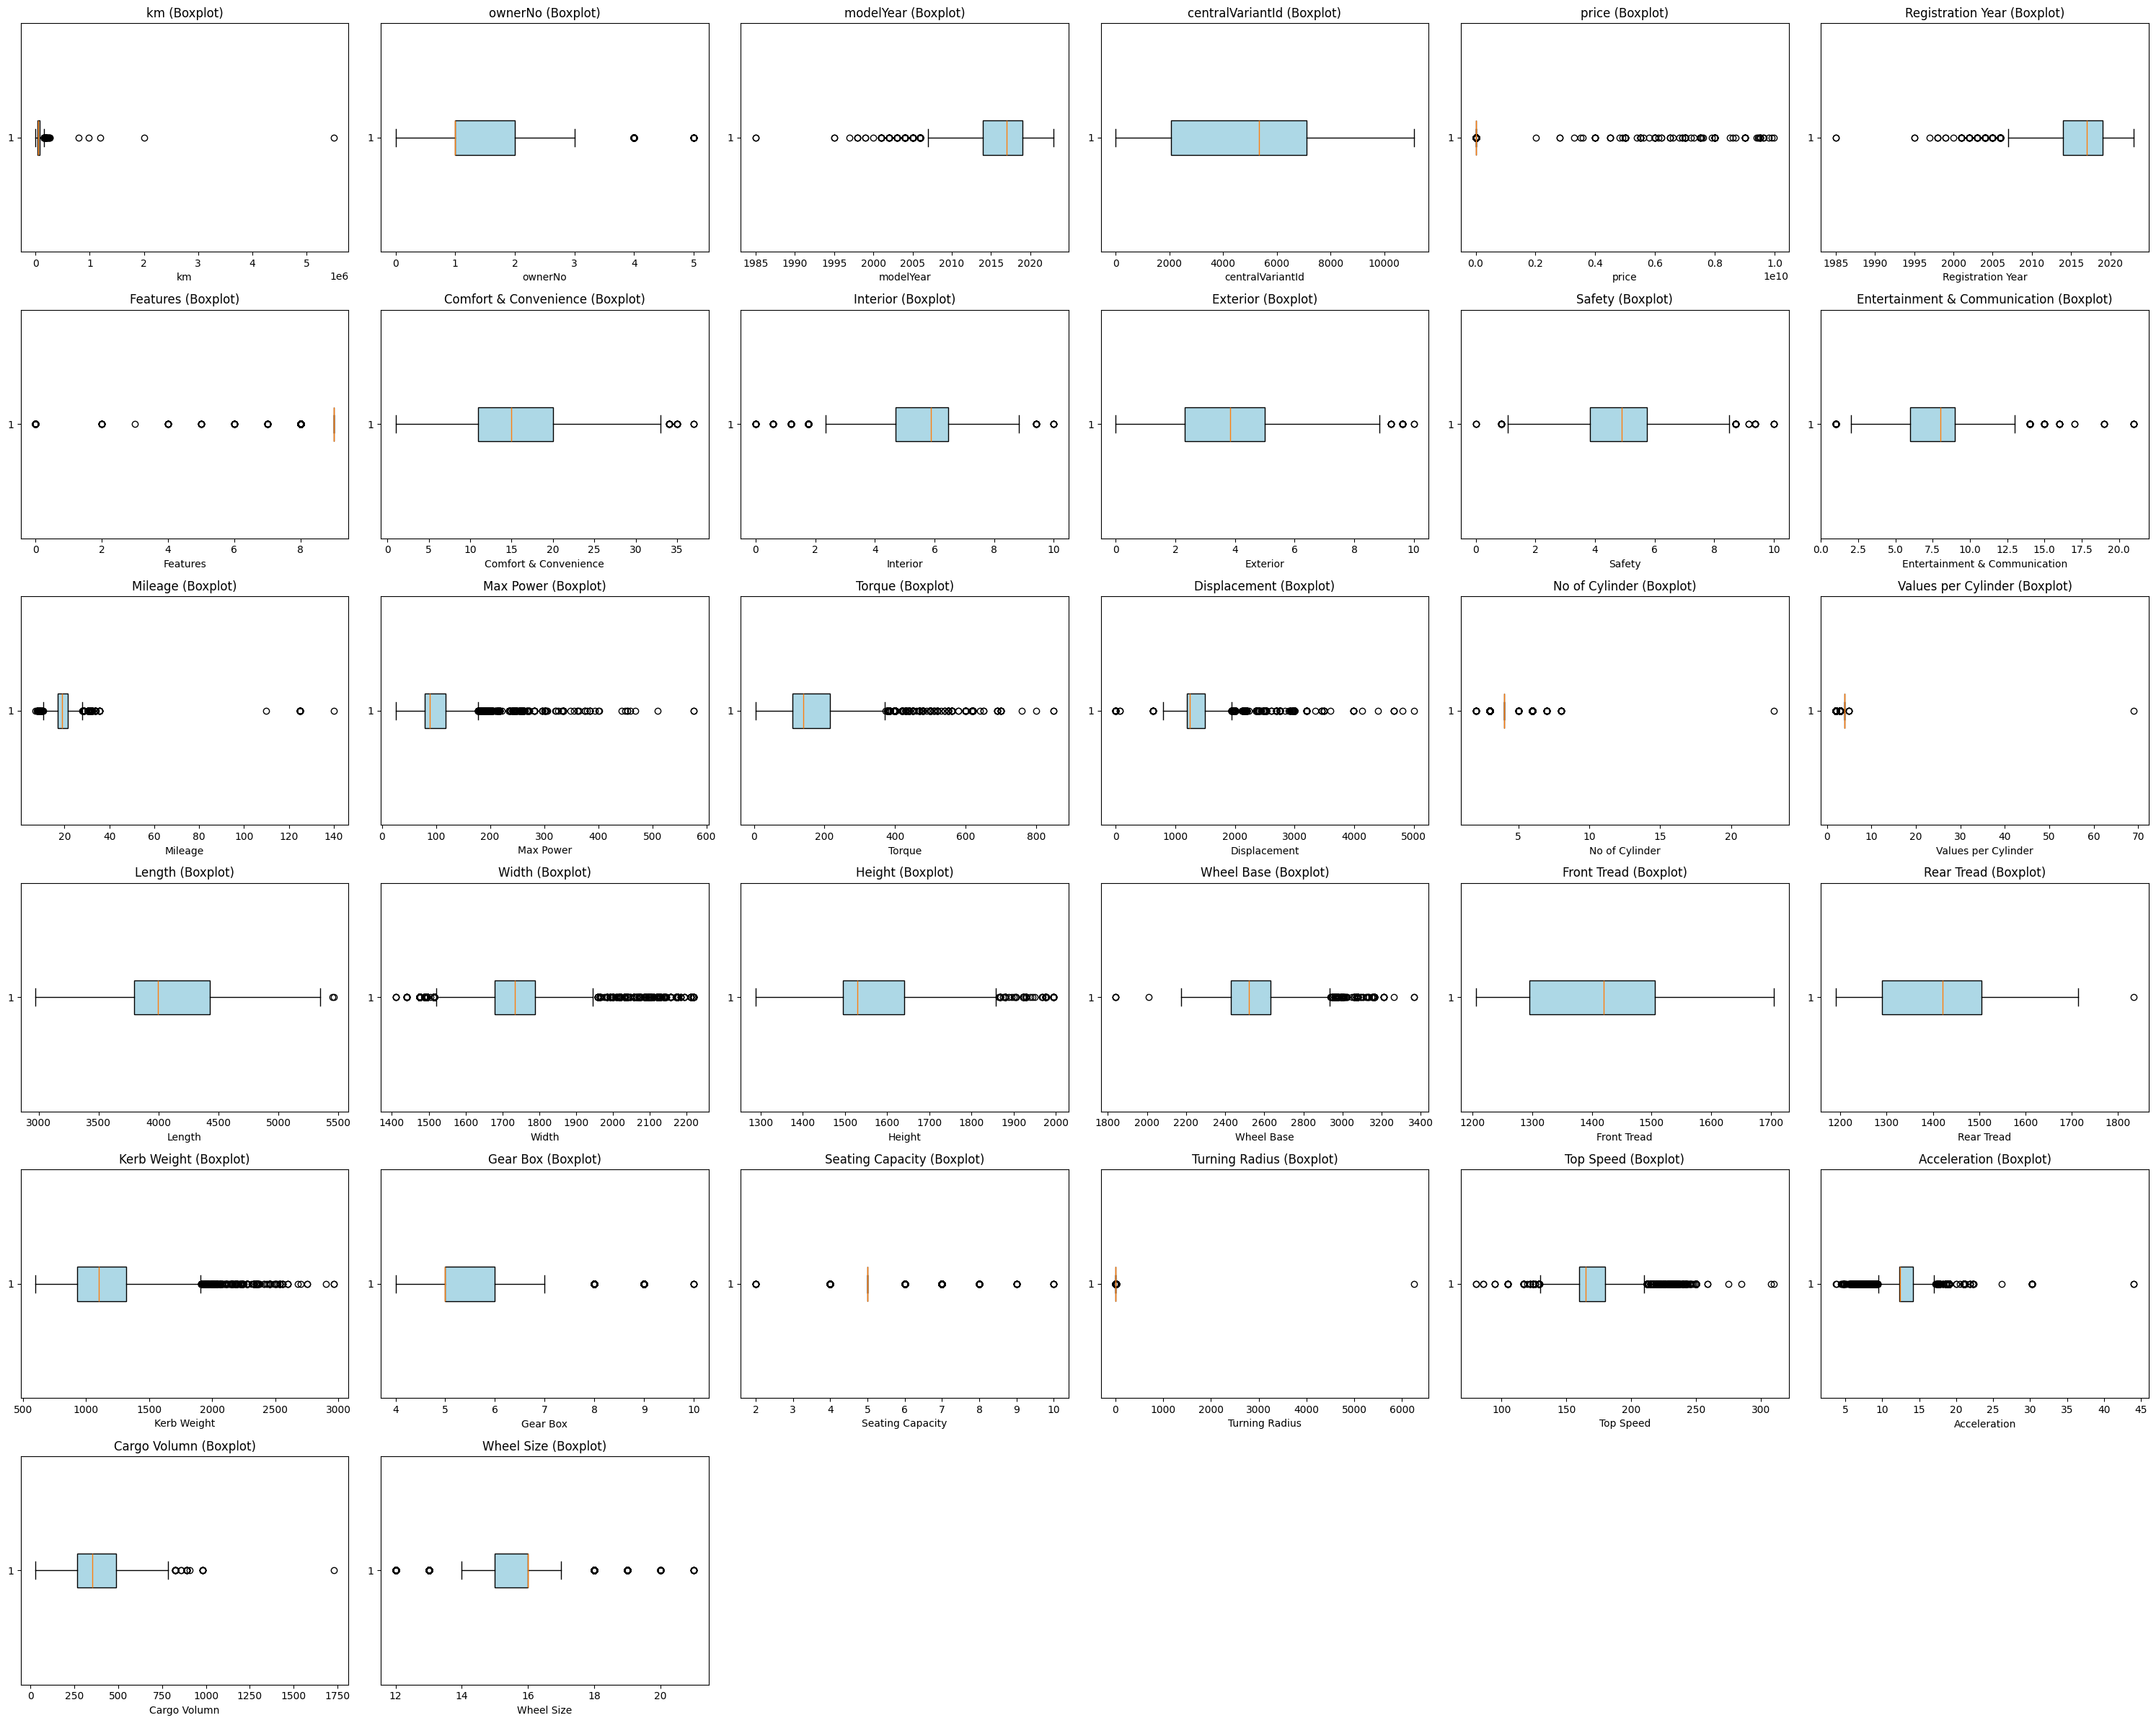

In [212]:
# Function to visualize outliers using boxplots for selected columns
def visualize_outliers_boxplot(df_CombinedData, columns, num_cols=6):
    num_rows = (len(columns) + num_cols - 1) // num_cols  # Calculate number of rows for subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        ax = axes[i]
        ax.boxplot(df_CombinedData[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
        ax.set_title(f"{col} (Boxplot)")
        ax.set_xlabel(col)
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])  # Remove unused axes

    plt.tight_layout()
    plt.show()

# Visualize outliers using boxplots for a sample of numerical columns (limit for visualization)
visualize_outliers_boxplot(df_CombinedData, numerical_columns)


Plot distplot with Fitted Curve for all the Numerical Columns

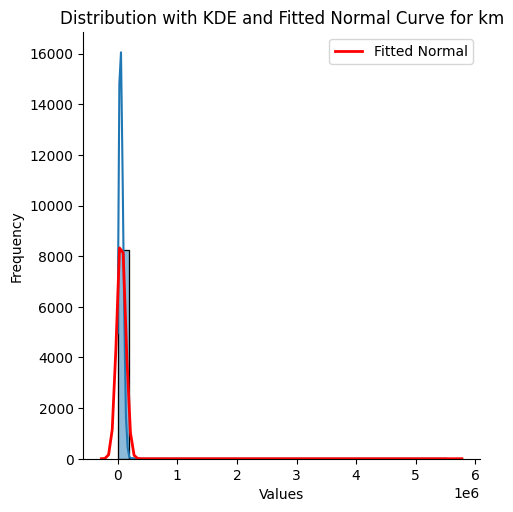

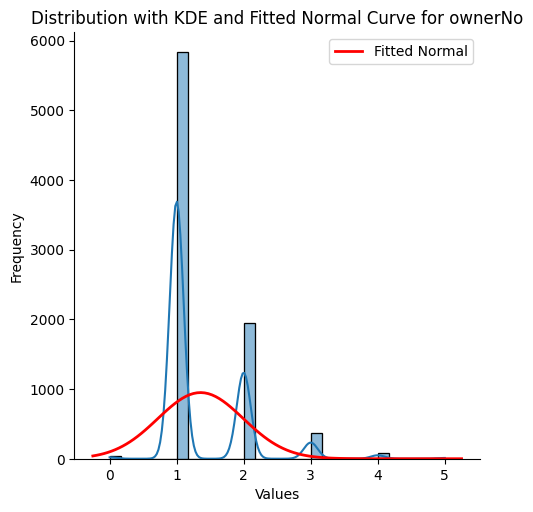

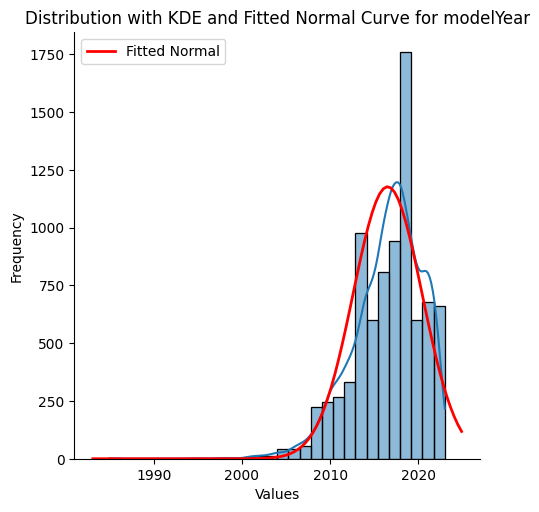

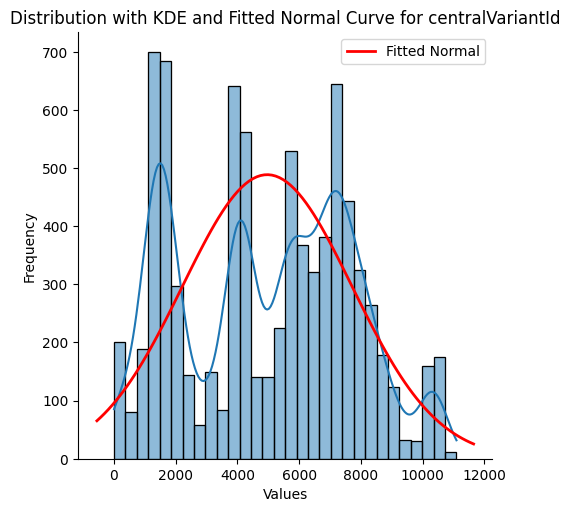

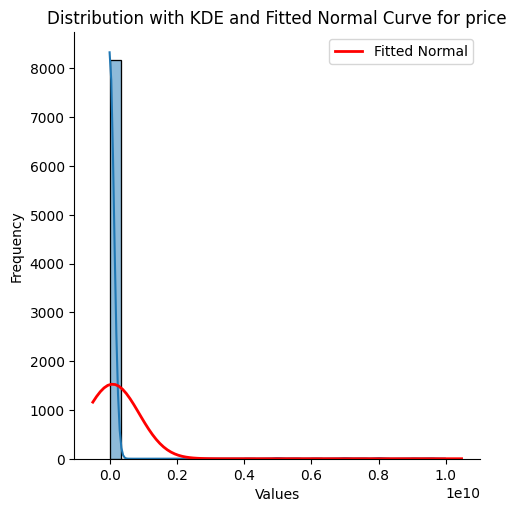

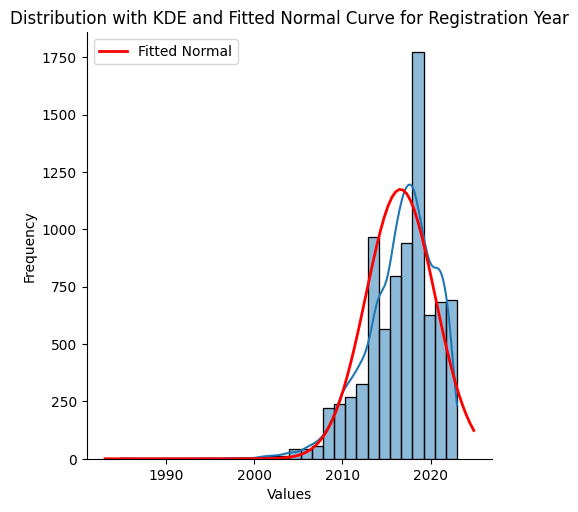

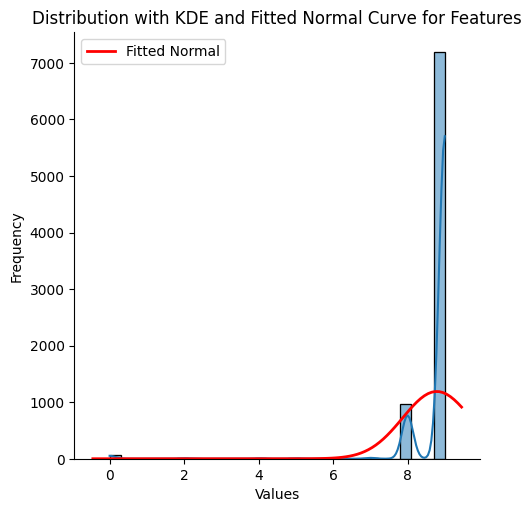

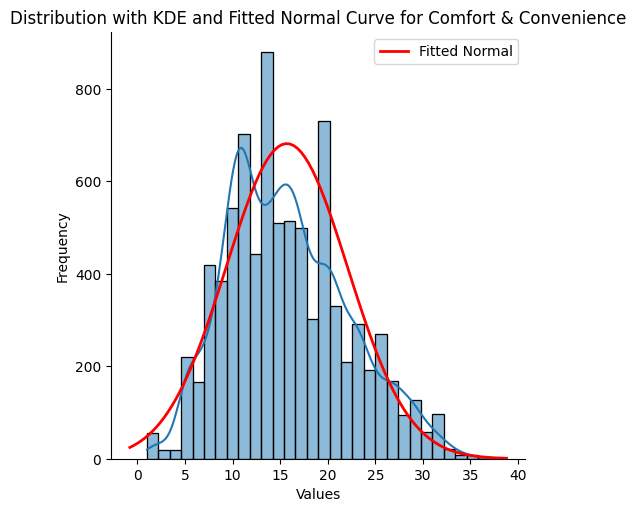

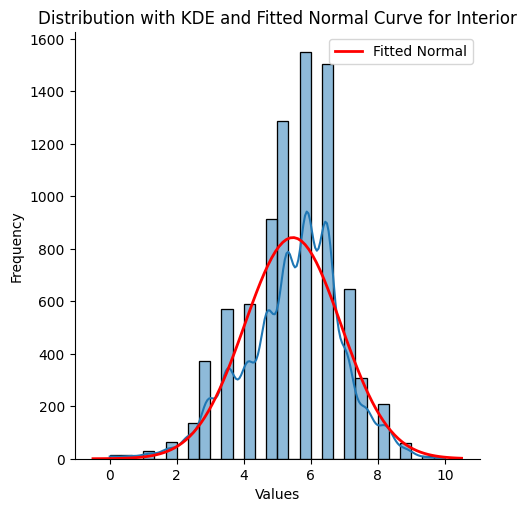

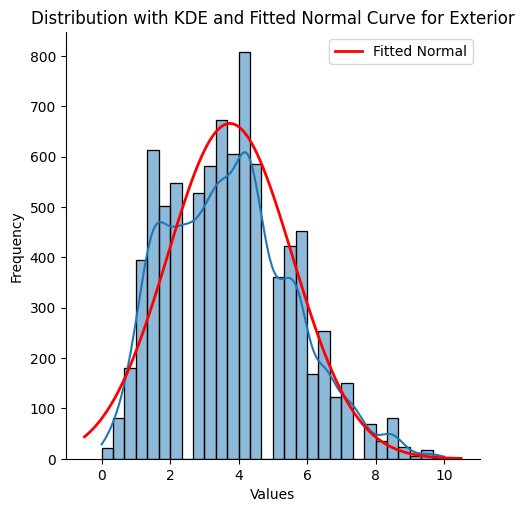

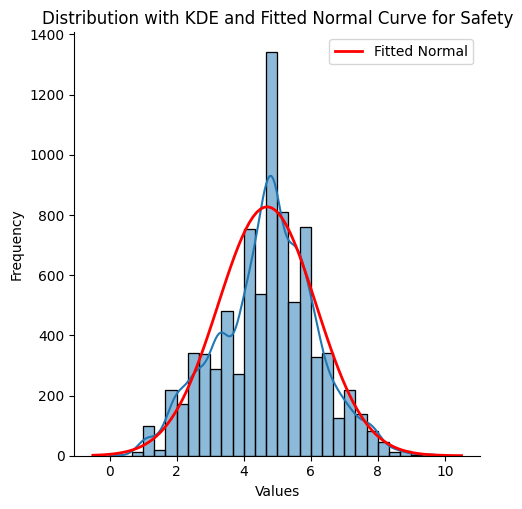

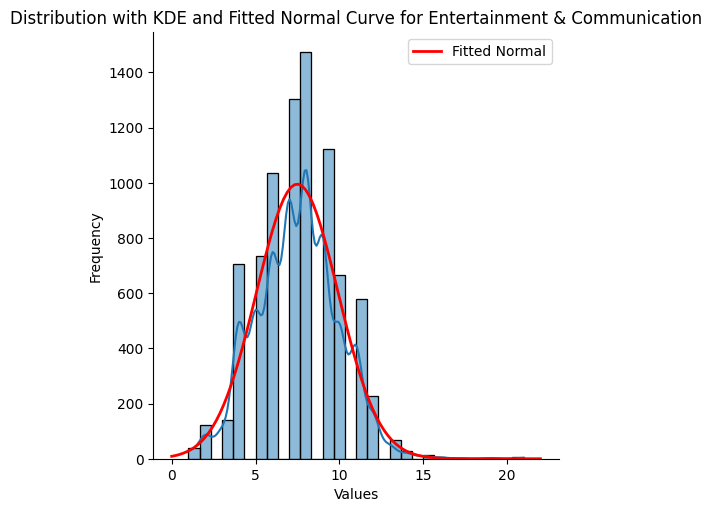

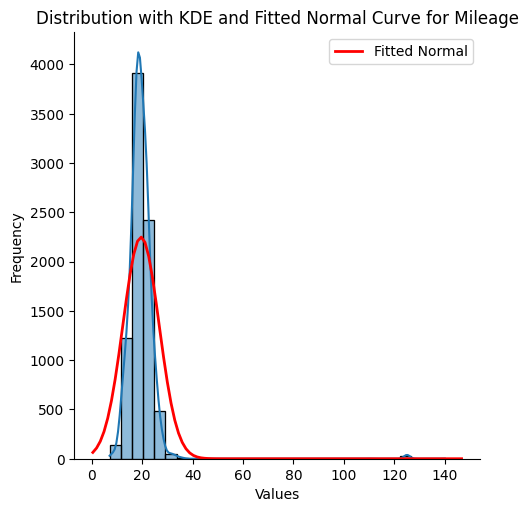

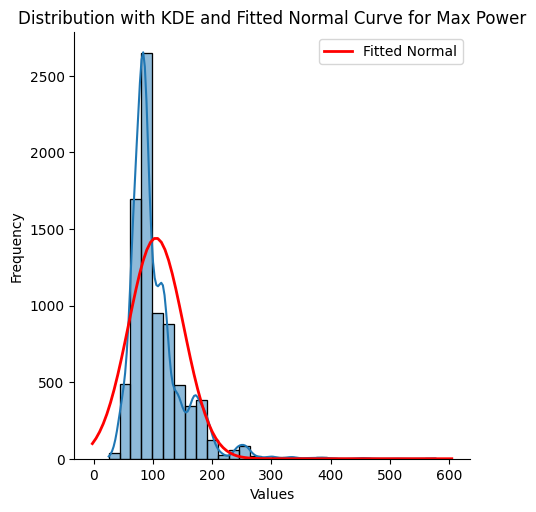

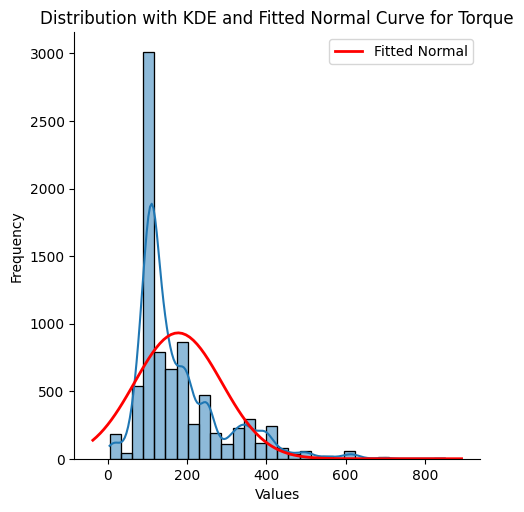

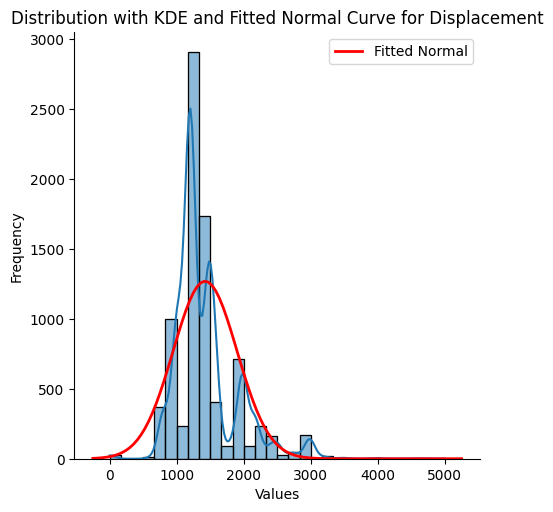

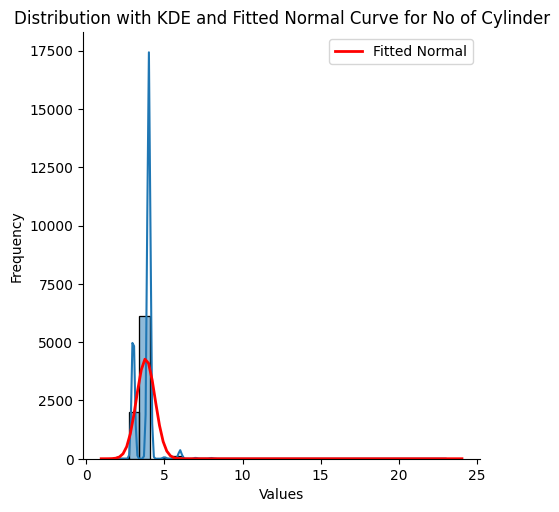

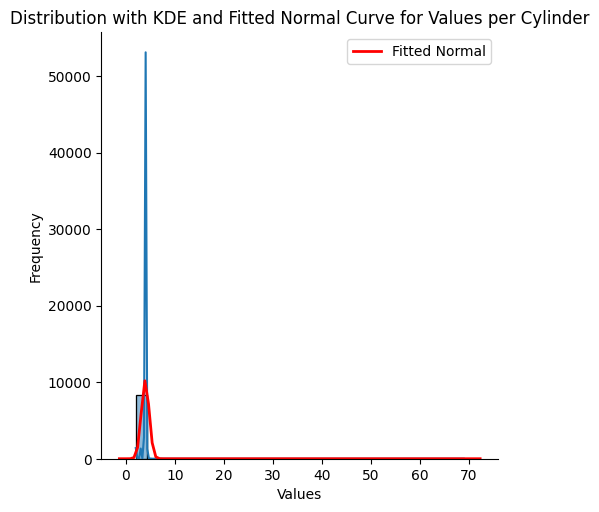

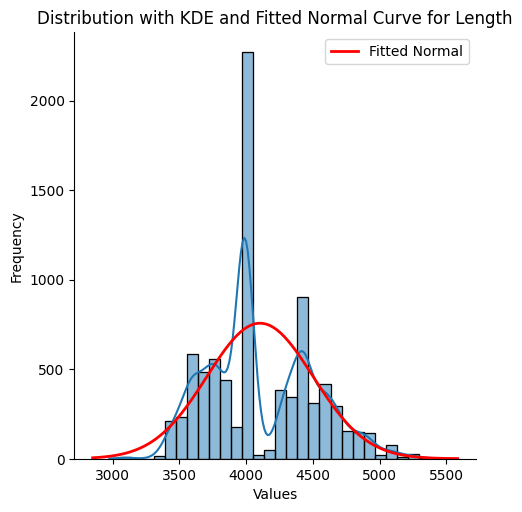

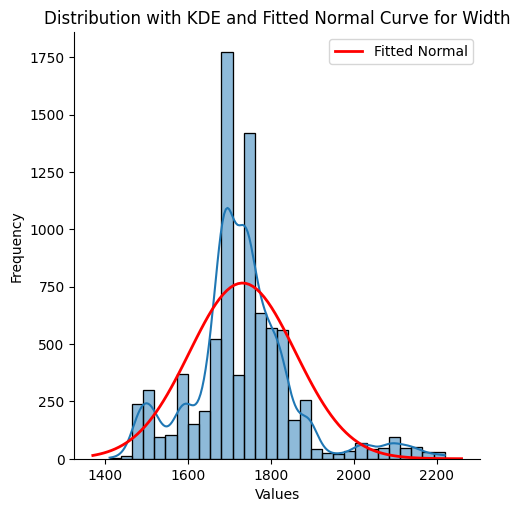

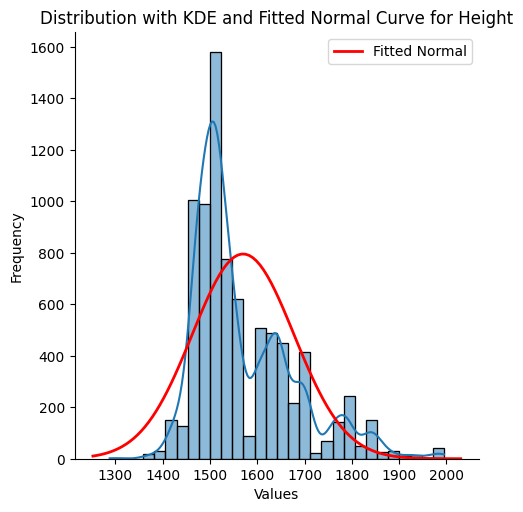

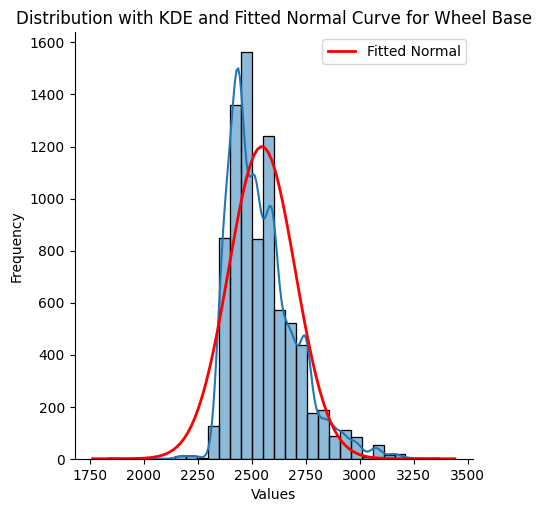

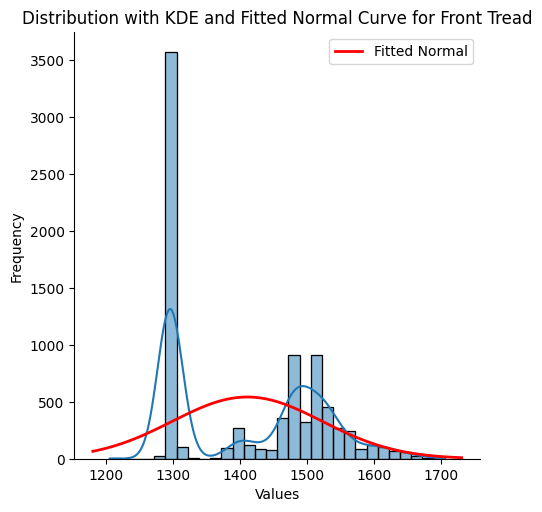

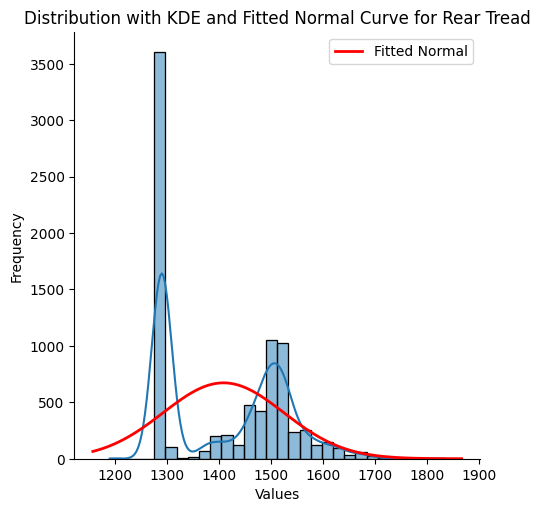

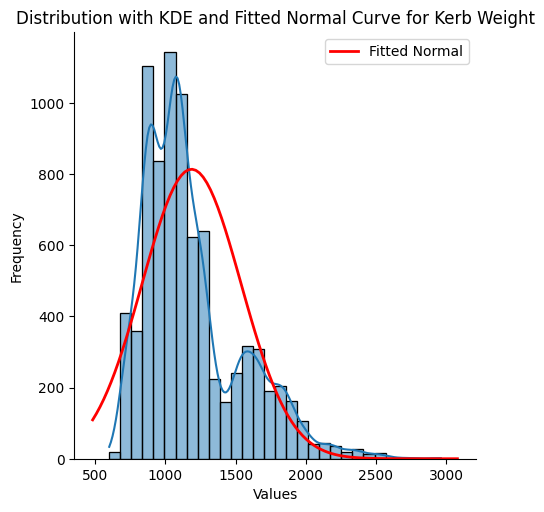

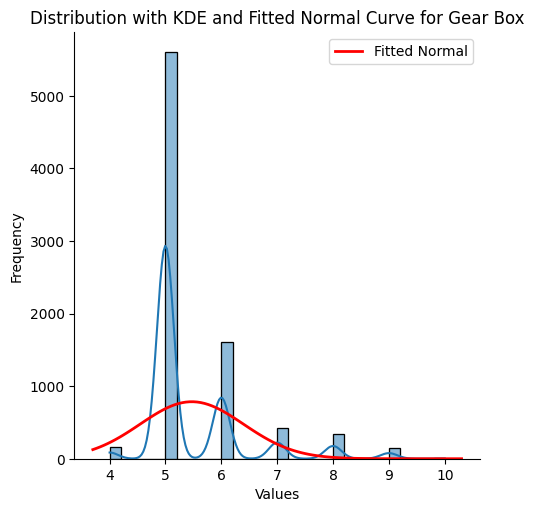

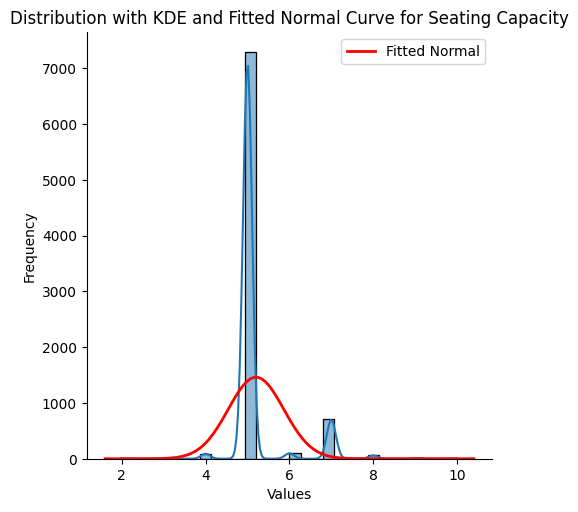

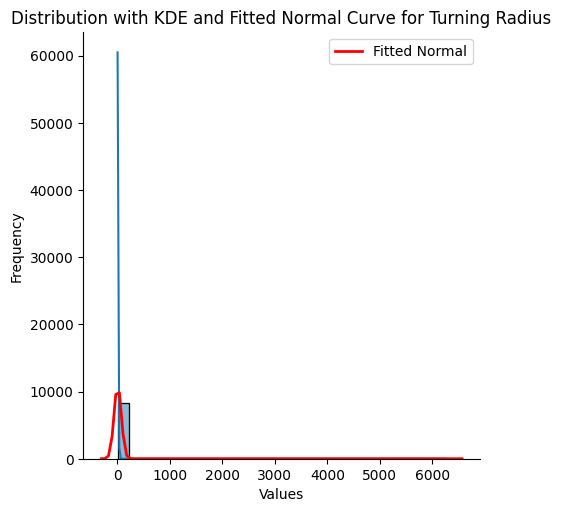

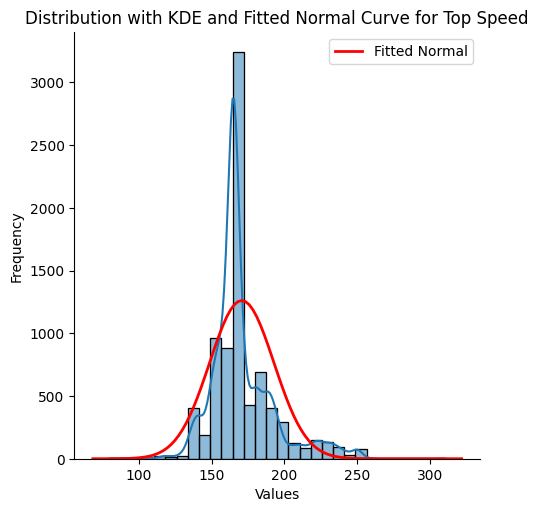

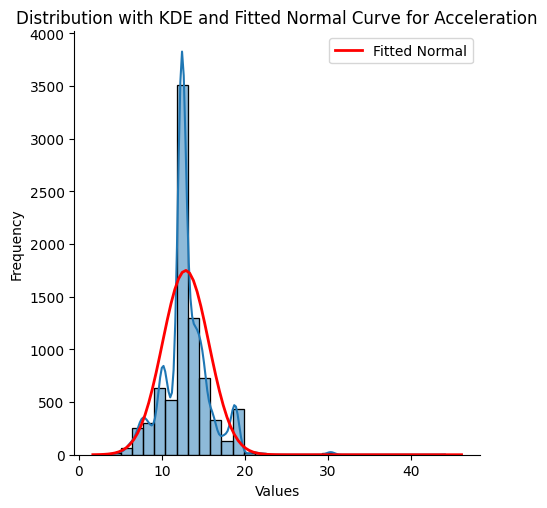

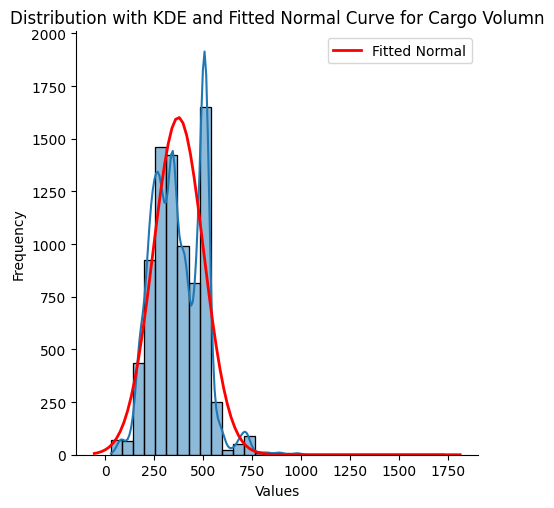

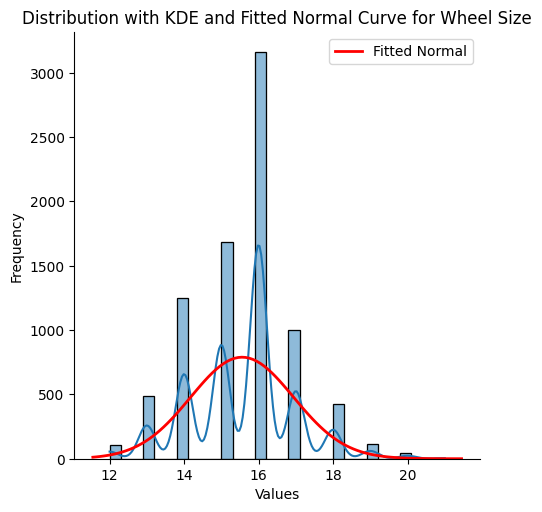

In [213]:
for col in numerical_columns:

    # Create a displot with KDE for the column data
    sns.displot(df_CombinedData[col], kde=True, bins=30)

    # Fit a normal distribution to the column data
    mu, sigma = norm.fit(df_CombinedData[col])  # Calculate mean (mu) and standard deviation (sigma)

    # Generate x values for the fitted normal curve
    xmin, xmax = plt.xlim()  # Get the x-axis limits
    x = np.linspace(xmin, xmax, 100)
    pdf = norm.pdf(x, mu, sigma)  # Generate the PDF

    # Overlay the fitted normal distribution curve on the plot
    plt.plot(x, pdf * len(df_CombinedData[col]) * (xmax - xmin) / 30, color='red', lw=2, label='Fitted Normal')
    plt.title(f'Distribution with KDE and Fitted Normal Curve for {col}')
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()



# Handling the Outliers 

Only handling outliers for 'Turning Radius', 'No of Cylinder', and 'Values per Cylinder' 
based on car domain knowledge:

- 'Turning Radius': Unusual values likely represent errors since this metric has practical limits.
- 'No of Cylinder': Engine configurations typically range between 4 and 8 cylinders; outliers are rare or erroneous.
- 'Values per Cylinder': Common configurations are 2 or 4 valves per cylinder; extreme values are unrealistic.

Other columns are ignored as their outliers represent valid variations 
or and are taken as-is for the next steps.

In [214]:
#Checking Skewness and Kurtosis fot the all numerical columns
for column in numerical_columns:
    print(f'Skewness of the {column} : ',df_CombinedData[column].skew())
    print(f'Kurtosis of the {column} : ',df_CombinedData[column].kurtosis())
    print("-----------------------------------------")

Skewness of the km :  50.321846620695695
Kurtosis of the km :  3528.5159643433653
-----------------------------------------
Skewness of the ownerNo :  1.8896380317702939
Kurtosis of the ownerNo :  4.3030634157761645
-----------------------------------------
Skewness of the modelYear :  -0.9168425723023568
Kurtosis of the modelYear :  1.8210528547893352
-----------------------------------------
Skewness of the centralVariantId :  0.005339401378901462
Kurtosis of the centralVariantId :  -1.0402420942405324
-----------------------------------------
Skewness of the price :  9.465673573923993
Kurtosis of the price :  91.83018959055562
-----------------------------------------
Skewness of the Registration Year :  -0.9301145789797911
Kurtosis of the Registration Year :  1.83748649532592
-----------------------------------------
Skewness of the Features :  -7.807182648505845
Kurtosis of the Features :  68.61548536342829
-----------------------------------------
Skewness of the Comfort & Conven

In [215]:
# Handle the value by dividing it by 1000
df_CombinedData.loc[5578, 'Turning Radius'] /= 1000

In [216]:
# Replace values in 'No of Cylinder' where it equals 23 with 4
df_CombinedData.loc[df_CombinedData['No of Cylinder'] == 23, 'No of Cylinder'] = 4


In [217]:
# Replace values in 'values per cylinder' where it equals 69 with 4
df_CombinedData.loc[df_CombinedData['Values per Cylinder'] == 69, 'Values per Cylinder'] = 4

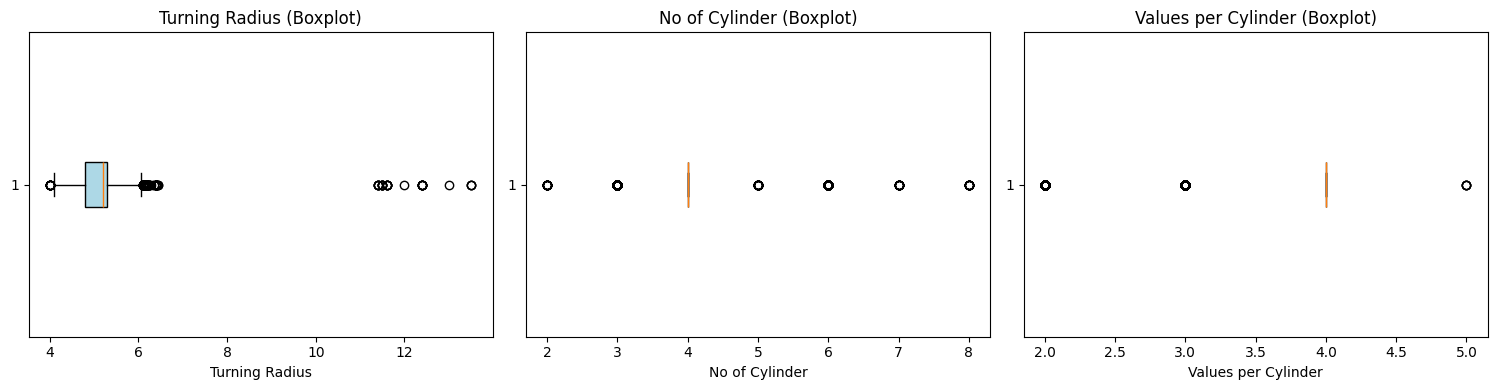

In [218]:
# Visualize outliers using boxplots for a sample of numerical columns (limit for visualization)
visualize_outliers_boxplot(df_CombinedData,['Turning Radius','No of Cylinder','Values per Cylinder'])

# Feature Selection 

In [220]:
df_CombinedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8277 entries, 0 to 8276
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   city                           8277 non-null   object 
 1   bt                             8277 non-null   object 
 2   km                             8277 non-null   float64
 3   ownerNo                        8277 non-null   int64  
 4   oem                            8277 non-null   object 
 5   model                          8277 non-null   object 
 6   modelYear                      8277 non-null   int64  
 7   centralVariantId               8277 non-null   int64  
 8   variantName                    8277 non-null   object 
 9   price                          8277 non-null   float64
 10  Registration Year              8277 non-null   float64
 11  Insurance Validity             8277 non-null   object 
 12  Fuel Type                      8277 non-null   o

In [221]:
numerical_columns

Index(['km', 'ownerNo', 'modelYear', 'centralVariantId', 'price',
       'Registration Year', 'Features', 'Comfort & Convenience', 'Interior',
       'Exterior', 'Safety', 'Entertainment & Communication', 'Mileage',
       'Max Power', 'Torque', 'Displacement', 'No of Cylinder',
       'Values per Cylinder', 'Length', 'Width', 'Height', 'Wheel Base',
       'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gear Box',
       'Seating Capacity', 'Turning Radius', 'Top Speed', 'Acceleration',
       'Cargo Volumn', 'Wheel Size'],
      dtype='object')

In [222]:
# Calculate the correlation matrix
correlation_matrix = df_CombinedData[numerical_columns].corr()

In [223]:
correlation_matrix

,km,ownerNo,modelYear,centralVariantId,price,Registration Year,Features,Comfort & Convenience,Interior,Exterior,Safety,Entertainment & Communication,Mileage,Max Power,Torque,Displacement,No of Cylinder,Values per Cylinder,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gear Box,Seating Capacity,Turning Radius,Top Speed,Acceleration,Cargo Volumn,Wheel Size
km,1.000000,0.114052,-0.243355,-0.188786,0.037748,-0.242244,-0.043945,-0.046495,-0.028519,-0.086506,-0.113183,-0.155429,-0.023577,-0.010559,0.044415,0.090663,0.080237,-0.039765,0.053638,0.017574,0.013957,0.029768,0.072897,0.071873,0.045003,-0.019876,0.075642,0.019673,0.024929,0.018674,0.025594,-0.078727
ownerNo,0.114052,1.000000,-0.387632,-0.254972,0.131124,-0.387974,-0.122785,-0.137146,-0.126966,-0.153744,-0.227382,-0.224027,-0.069837,-0.031063,-0.038723,0.052655,0.034273,-0.115615,-0.022128,-0.065980,-0.062132,-0.047936,0.034379,0.034155,-0.015582,-0.062658,0.011640,-0.012382,-0.012627,0.074172,0.024092,-0.157694
modelYear,-0.243355,-0.387632,1.000000,0.611025,-0.287084,0.996739,0.324475,0.357671,0.351496,0.423520,0.571354,0.584560,0.119069,0.147216,0.151533,-0.040875,-0.079967,0.197110,0.093293,0.218244,0.163965,0.154381,-0.092395,-0.085482,0.121396,0.198745,0.004027,0.091304,0.032609,-0.174544,-0.012210,0.464365
centralVariantId,-0.188786,-0.254972,0.611025,1.000000,-0.079006,0.608735,0.116036,0.172640,0.062919,0.248253,0.411031,0.448976,0.107279,0.030431,0.000500,-0.116887,-0.155833,0.173726,-0.030137,0.076317,0.171142,0.020151,-0.144452,-0.135417,0.001051,0.092326,0.006388,-0.015544,-0.135457,-0.033561,-0.013813,0.269082
price,0.037748,0.131124,-0.287084,-0.079006,1.000000,-0.287341,-0.214817,-0.141821,-0.195002,-0.119591,-0.192076,-0.106625,-0.027921,-0.086466,-0.092822,-0.070572,-0.047620,-0.191715,-0.104184,-0.136622,-0.051352,-0.118598,-0.078812,-0.082431,-0.091205,-0.070717,-0.039360,-0.073222,-0.087861,0.086711,0.035572,-0.199093
Registration Year,-0.242244,-0.387974,0.996739,0.608735,-0.287341,1.000000,0.319904,0.356190,0.350545,0.420834,0.570485,0.582898,0.119062,0.146154,0.150586,-0.042569,-0.080944,0.197413,0.091340,0.216227,0.160859,0.152812,-0.090097,-0.083379,0.118569,0.197866,0.001078,0.090569,0.033707,-0.174139,-0.012630,0.461956
Features,-0.043945,-0.122785,0.324475,0.116036,-0.214817,0.319904,1.000000,0.240519,0.275395,0.214193,0.225927,0.145530,0.023332,0.128136,0.128357,0.065093,0.019542,0.057216,0.128420,0.155333,0.043804,0.153667,0.113275,0.118441,0.129545,0.111514,0.000637,0.068605,0.132536,-0.132341,-0.010078,0.187398
Comfort & Convenience,-0.046495,-0.137146,0.357671,0.172640,-0.141821,0.356190,0.240519,1.000000,0.791771,0.767320,0.807996,0.598470,-0.154519,0.673337,0.592096,0.513144,0.406048,0.184008,0.717415,0.667835,0.117791,0.678487,0.210456,0.209114,0.625743,0.614959,0.083962,0.483106,0.562860,-0.585711,0.457439,0.587068
Interior,-0.028519,-0.126966,0.351496,0.062919,-0.195002,0.350545,0.275395,0.791771,1.000000,0.716057,0.729231,0.534005,-0.176165,0.601515,0.534455,0.475390,0.364802,0.165861,0.626738,0.650945,0.102494,0.603273,0.266408,0.268974,0.547963,0.520580,0.074270,0.435930,0.539423,-0.530248,0.338770,0.544877
Exterior,-0.086506,-0.153744,0.423520,0.248253,-0.119591,0.420834,0.214193,0.767320,0.716057,1.000000,0.731481,0.649583,-0.135826,0.567102,0.522605,0.398531,0.272711,0.153556,0.538968,0.597421,0.260831,0.554828,0.092764,0.098668,0.576189,0.507615,0.116202,0.418572,0.394819,-0.464604,0.311058,0.586715


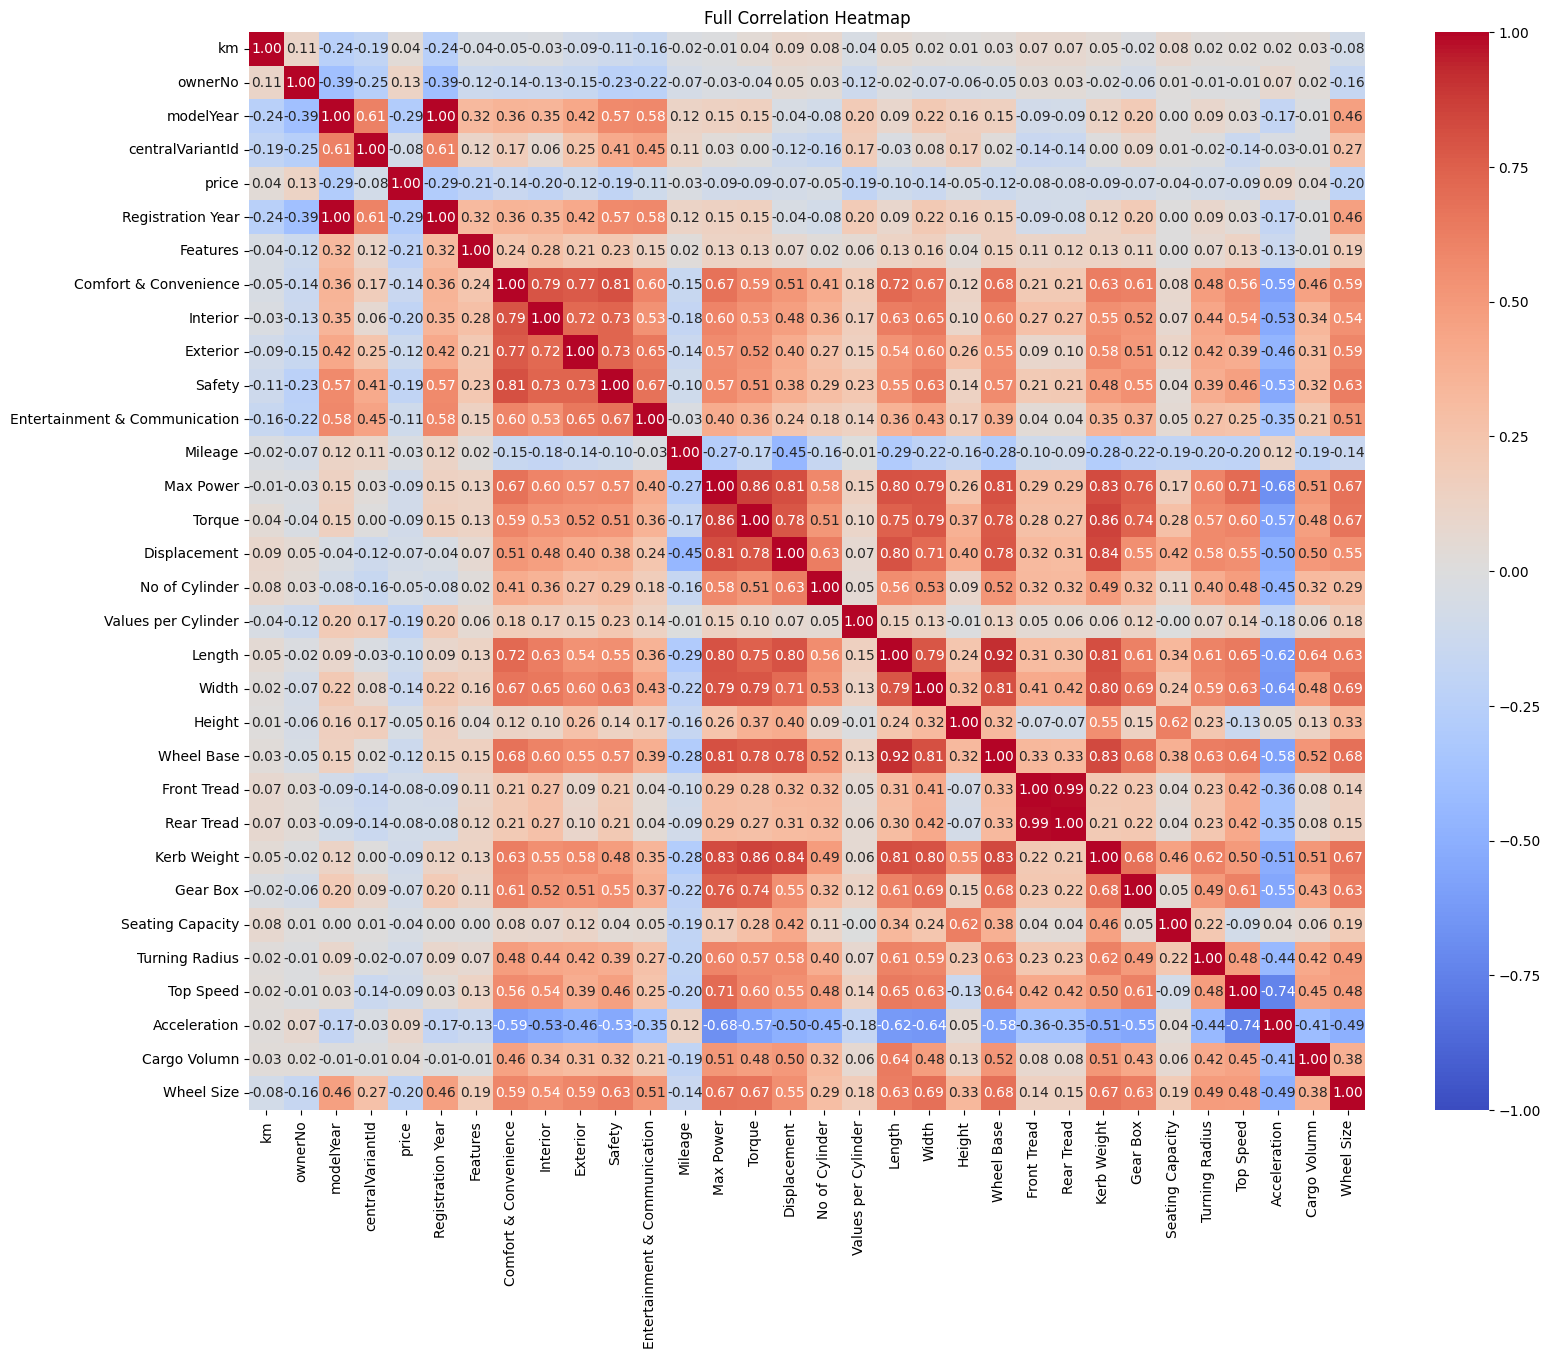

In [224]:
# Plot the full correlation heatmap for all numeric columns
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Full Correlation Heatmap')
plt.show()

In [225]:
# Compute the correlation matrix
correlation_matrix = df_CombinedData[numerical_columns].corr()

# Extract correlations with the 'price' column, sorting them by magnitude
price_correlation = correlation_matrix['price'].sort_values(ascending=False)

# Display the correlations with 'price'
price_correlation

price                            1.000000
ownerNo                          0.131124
Acceleration                     0.086711
km                               0.037748
Cargo Volumn                     0.035572
Mileage                         -0.027921
Seating Capacity                -0.039360
No of Cylinder                  -0.047620
Height                          -0.051352
Displacement                    -0.070572
Gear Box                        -0.070717
Turning Radius                  -0.073222
Front Tread                     -0.078812
centralVariantId                -0.079006
Rear Tread                      -0.082431
Max Power                       -0.086466
Top Speed                       -0.087861
Kerb Weight                     -0.091205
Torque                          -0.092822
Length                          -0.104184
Entertainment & Communication   -0.106625
Wheel Base                      -0.118598
Exterior                        -0.119591
Width                           -0

In [226]:
df2 = df_CombinedData.copy()

encoder = LabelEncoder()

for i in df2.select_dtypes(include="object").columns:
  df2[i] = encoder.fit_transform(df2[i])

In [227]:
# Compute the correlation matrix
correlation_matrix = df2.corr()

# Extract correlations with the 'price' column, sorting them by magnitude
price_correlation1 = correlation_matrix['price'].sort_values(ascending=False)

# Display the correlations with 'price'
price_correlation1

price                            1.000000
ownerNo                          0.131124
Value Configuration              0.118391
Acceleration                     0.086711
Fuel Suppy System                0.077096
Transmission                     0.066150
Insurance Validity               0.054739
Fuel Type                        0.050803
Front Brake Type                 0.038664
km                               0.037748
city                             0.036722
Cargo Volumn                     0.035572
Steering Type                    0.035569
Rear Brake Type                  0.016584
Tyre Type                        0.007356
Engine Type                      0.006606
model                            0.002980
Color                            0.002924
oem                             -0.001641
Super Charger                   -0.004912
Drive Type                      -0.005815
variantName                     -0.007621
RTO                             -0.024521
Mileage                         -0

In [229]:
df2.head(10)

,city,bt,km,ownerNo,oem,model,modelYear,centralVariantId,variantName,price,Registration Year,Insurance Validity,Fuel Type,RTO,Transmission,Features,Comfort & Convenience,Interior,Exterior,Safety,Entertainment & Communication,Mileage,Max Power,Torque,Color,Engine Type,Displacement,No of Cylinder,Values per Cylinder,Value Configuration,Fuel Suppy System,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Cargo Volumn,Wheel Size
0,0,2,120000.0,3,17,160,2015,3979,1806,400000.0,2015.0,2,4,165,1,8,10.0,7.0,5.0,13.0,7.0,23.10,67.04,90.00,37,277,998.0,3.0,4.0,1,35,0,0,3715.0,1635.0,1565.0,2425.0,1420.0,1410.0,835.0,5.0,10,5.0,3,4.7,12,4,150.00,15.05,10,235.0,16.0
1,0,8,32706.0,2,6,50,2018,6087,288,811000.0,2018.0,0,4,135,1,9,17.0,12.0,12.0,27.0,9.0,17.00,121.31,150.00,37,386,1497.0,3.0,4.0,1,14,0,0,3998.0,1765.0,1647.0,2519.0,1519.0,1524.0,1242.0,5.0,10,5.0,3,5.3,12,4,171.43,12.51,10,352.0,16.0
2,0,2,11949.0,1,27,273,2018,2983,129,585000.0,2018.0,0,4,133,1,9,14.0,12.0,13.0,24.0,8.0,23.84,84.00,114.00,29,353,1199.0,3.0,4.0,1,35,0,0,3746.0,1647.0,1535.0,2400.0,1400.0,1420.0,1012.0,5.0,10,5.0,3,4.9,2,4,150.00,14.30,6,242.0,14.0
3,0,7,17794.0,1,9,87,2014,1867,101,462000.0,2014.0,0,4,167,1,9,16.0,10.0,10.0,18.0,7.0,19.10,81.86,113.75,23,304,1197.0,4.0,4.0,1,14,0,0,3995.0,1660.0,1520.0,2425.0,1479.0,1493.0,1180.0,5.0,11,5.0,3,4.7,2,4,172.00,14.20,10,407.0,14.0
4,0,8,60000.0,1,17,178,2015,4277,987,790000.0,2015.0,2,1,134,1,9,21.0,11.0,13.0,22.0,8.0,23.65,88.50,200.00,16,202,1248.0,4.0,4.0,1,35,2,0,4300.0,1785.0,1595.0,2600.0,1295.0,1290.0,1230.0,5.0,10,5.0,3,5.2,12,2,190.00,12.00,10,353.0,16.0
5,0,8,20000.0,1,12,101,2020,5931,485,1900000.0,2020.0,2,1,134,1,9,13.0,11.0,15.0,22.0,8.0,17.10,170.00,350.00,23,111,1956.0,4.0,4.0,1,9,2,0,4395.0,1818.0,1640.0,2636.0,1295.0,1290.0,1551.0,6.0,5,5.0,3,5.3,2,3,165.00,10.03,2,408.0,17.0
6,0,2,37772.0,1,4,37,2017,5223,1684,345000.0,2017.0,0,4,135,1,9,11.0,8.0,5.0,17.0,5.0,20.63,67.00,104.00,16,346,1198.0,3.0,4.0,1,20,0,0,3785.0,1635.0,1490.0,2450.0,1440.0,1445.0,1070.0,5.0,10,5.0,3,4.6,2,4,150.00,13.30,6,265.0,16.0
7,0,8,30000.0,1,9,85,2021,6946,1581,1200000.0,2021.0,2,4,165,0,9,20.0,11.0,12.0,31.0,6.0,18.15,118.35,171.60,23,298,998.0,3.0,4.0,1,30,2,0,3995.0,1770.0,1605.0,2500.0,1295.0,1290.0,1440.0,7.0,10,5.0,3,5.3,2,4,165.00,12.36,0,350.0,16.0
8,0,7,37000.0,1,17,163,2018,6555,834,960000.0,2018.0,0,4,133,0,9,22.0,12.0,11.0,29.0,8.0,20.28,103.25,138.00,17,290,1462.0,4.0,4.0,1,35,0,0,4490.0,1730.0,1485.0,2650.0,1495.0,1505.0,1105.0,4.0,10,5.0,3,5.4,12,4,190.00,14.00,10,510.0,16.0
9,0,2,11949.0,1,27,273,2017,2985,133,585000.0,2018.0,0,4,133,1,9,14.0,11.0,13.0,24.0,8.0,23.84,84.00,114.00,29,353,1199.0,3.0,4.0,1,35,0,0,3746.0,1647.0,1535.0,2400.0,1400.0,1420.0,1012.0,5.0,10,5.0,3,4.9,2,4,150.00,14.30,6,242.0,14.0


In [231]:
# Create the Final_Data DataFrame by selecting specific columns
Final_Data = df2[['oem', 'model', 'modelYear', 'Registration Year', 'Mileage', 
                  'Fuel Type', 'Transmission', 'ownerNo', 'price', 'Gear Box', 
                  'city', 'km', 'Safety', 'Interior', 'Exterior', 
                  'Insurance Validity', 'bt']]

In [232]:
# Save the Final_Data DataFrame to a CSV file in the specified directory.
Final_Data.to_csv(r"D:\DataScience\GUVI\DataScience_GUVI_Projects\CarDheko_Project\DataSets\New_Structured_Data\DomainBased_Handled_data.csv",index=False)